# Modeling 

 - For EDA and Feature Selection/Engineering, refer to <i>EDA_and_Preprocessing.ipynb</i>.
 - For defined functions, refer to <i>utility.py</i>.
 - For dependencies, refer to <i>requirements.txt</i>.
     - to download dependencies, access appropriate directory and run following code in terminal, <b>pip install 
-r requirements.txt </b>.
 - To learn more about deploying the model, refer to <i>App.py</i> (<b>Flask</b>) and <i>templates</i> (<b>HTML code</b>).

In [1]:
'''

Importing preprocessed dataframe (see utility.py for more information)

'''
from utility import homes, check_class_imbalance,check_dist,target_correlation,preprocessed_DF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8.0, 5.0] # setting plotting settings for the remaining of the notebook
plt.rcParams['figure.dpi'] = 140 #setting pixels

In [453]:
## How features will be classified based ond EDA and preprocessing (refer to EDA & preprocessing notebook)
    
num_cols = ['GrLivArea','LotFrontage', 'LotArea','YearBuilt','GarageArea', 'TotSft','YearRemodAdd','BsmtFinSF1',
           'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath',
           'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF',
            'MoSold'
           ]

ordinal_cols = ['Condition1','Condition2', 'OverallQual','OverallCond','ExterQual','ExterCond',
          'BsmtQual','BsmtCond','KitchenQual','GarageQual','GarageCond', 'HeatingQC', 'Neighborhood','GarageFinish',
          'GarageCars']


nominal_cols = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
          'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
          'Foundation','BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'Heating','CentralAir',
          'Electrical','Functional', 'GarageType', 'GarageFinish']

cols_to_drop = ['PID','Unnamed: 0','Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature','MiscVal',
           'YrSold','SaleType','SaleCondition']

In [442]:
df_object = homes.select_dtypes(include='object') 
#creating DF with all non-numeric columns (potentially categorical) to check class balance. 
df_numeric = homes.select_dtypes(exclude = 'object')

In [365]:
plt.rcParams['figure.figsize'] = [20.0, 15.0] # setting plotting settings for the remaining of the notebook
plt.rcParams['figure.dpi'] = 140 #setting pixels

<Figure size 1680x7000 with 0 Axes>

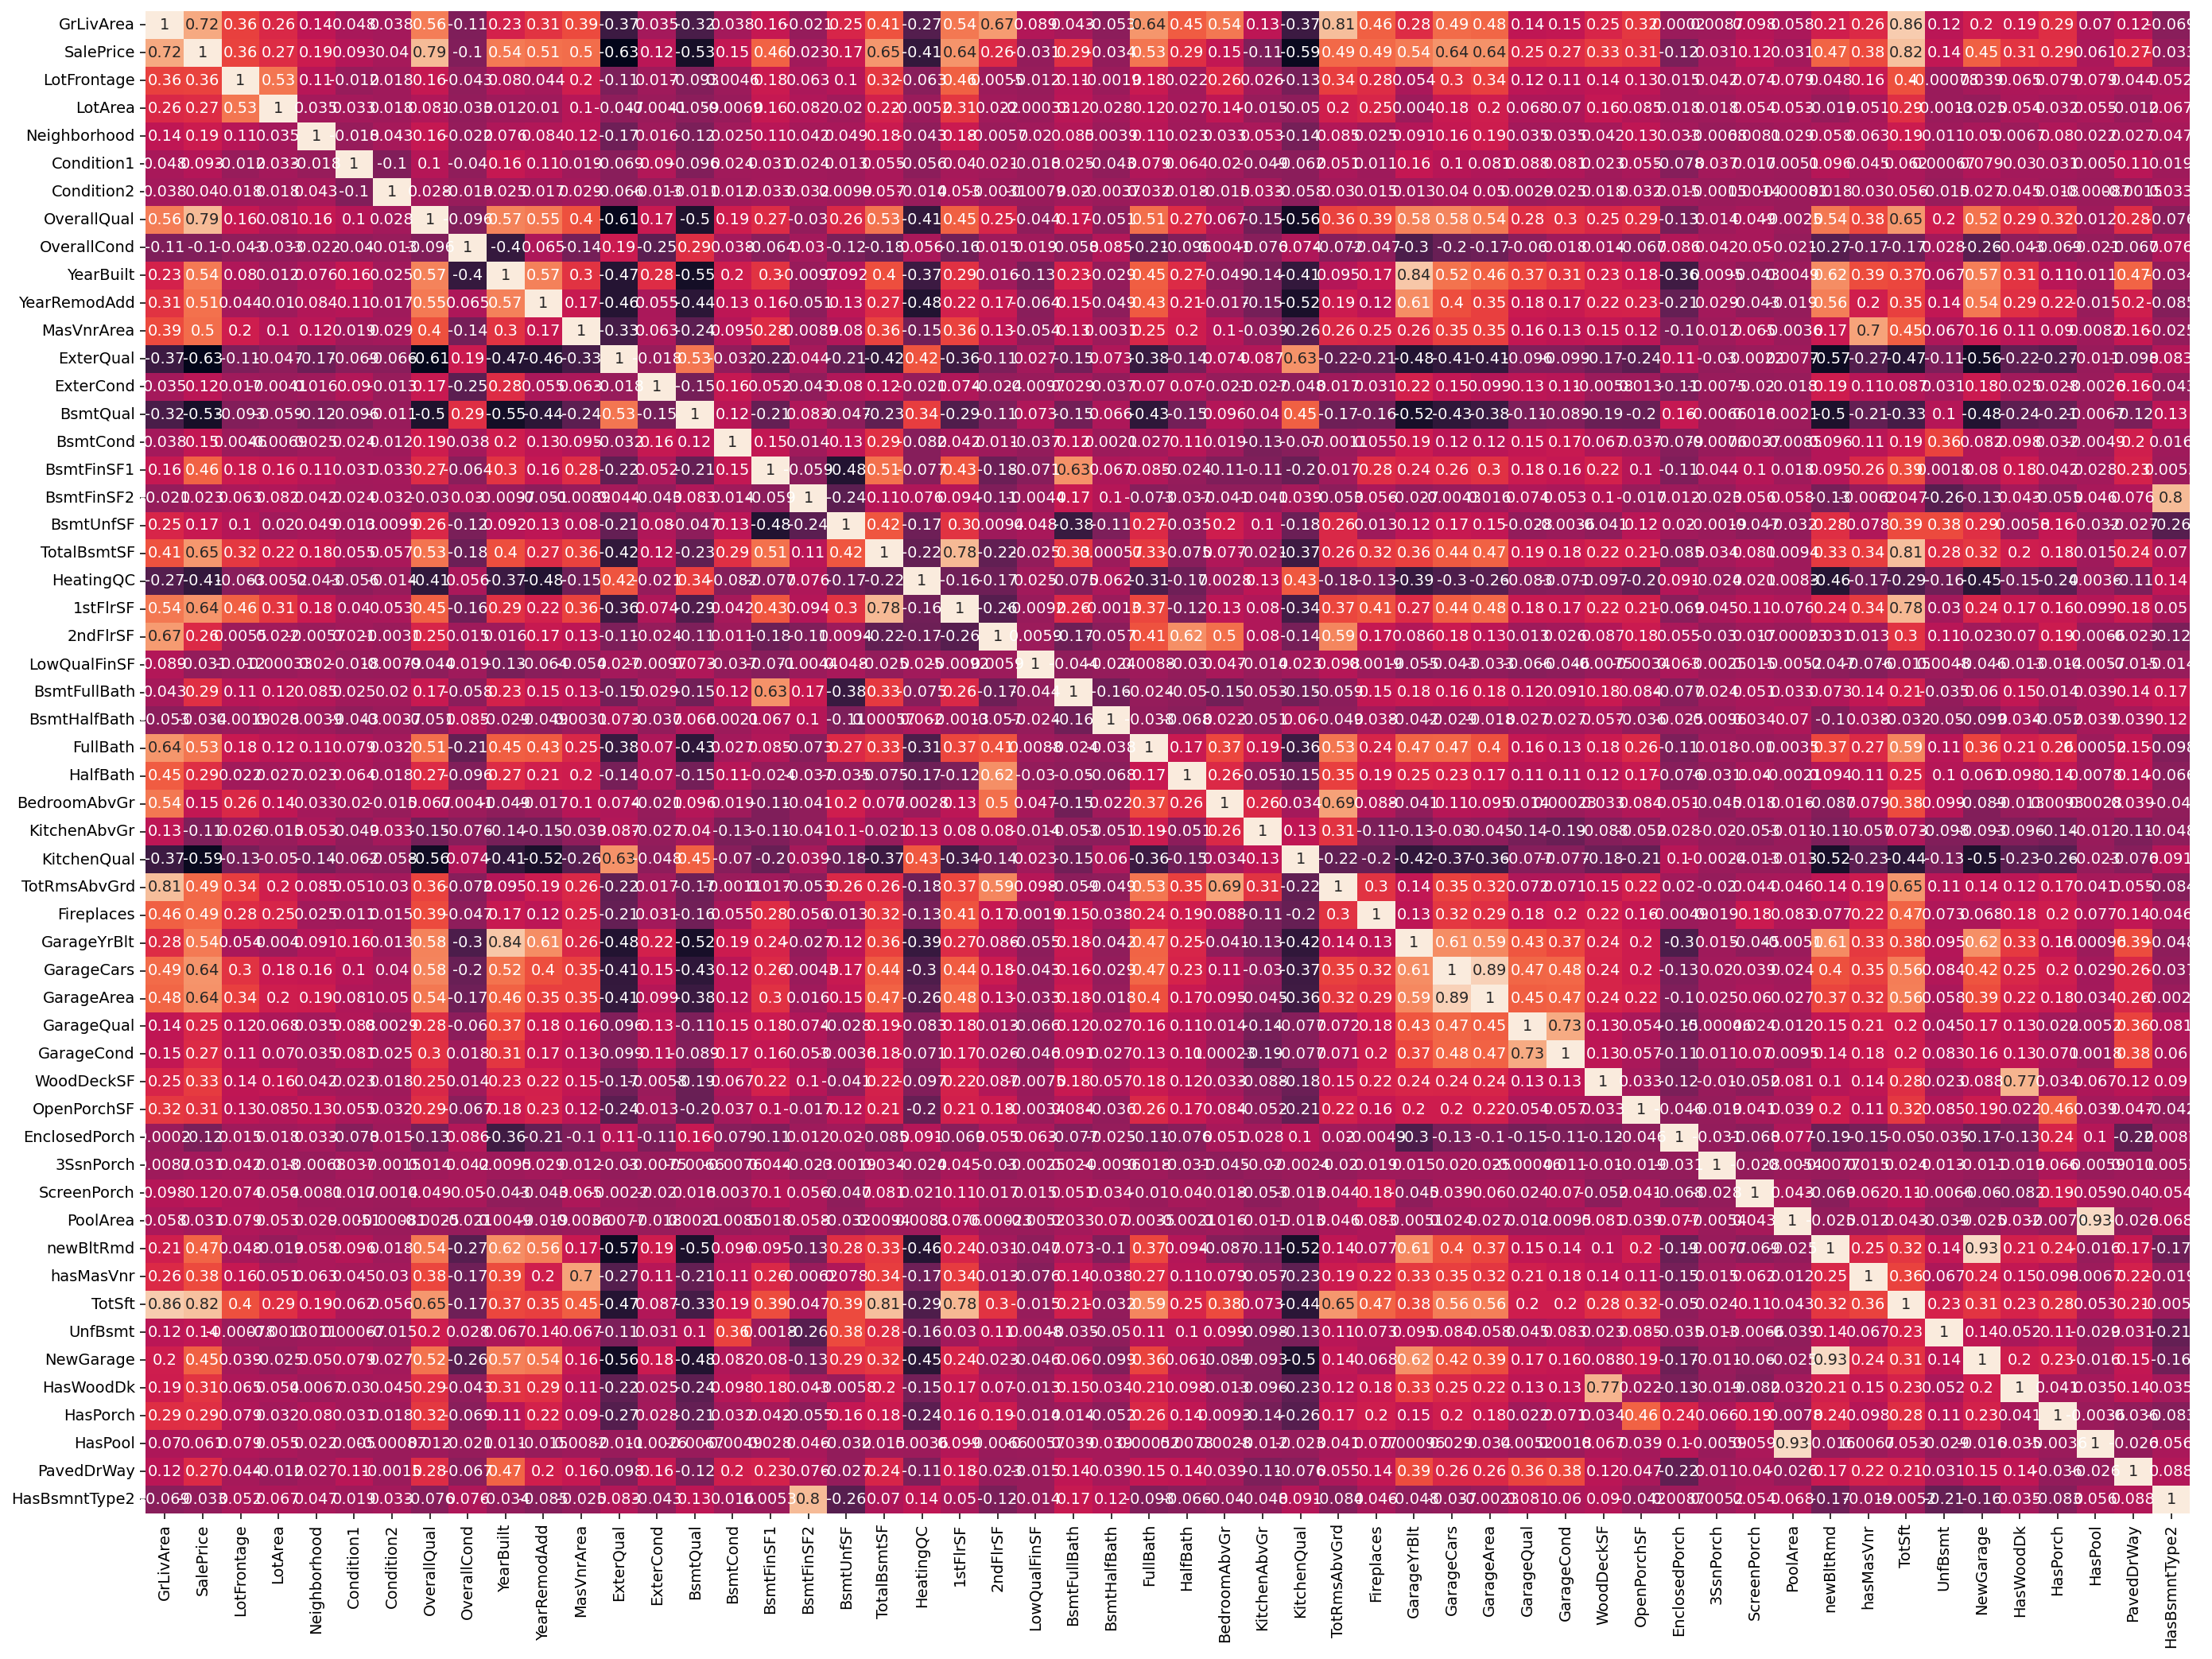

<Figure size 1680x7000 with 0 Axes>

In [366]:
sns.heatmap(homeDF_noScale.select_dtypes(exclude='uint8').corr(), cbar=False,annot=True)
plt.tight_layout()
plt.figure(figsize=(12,50))

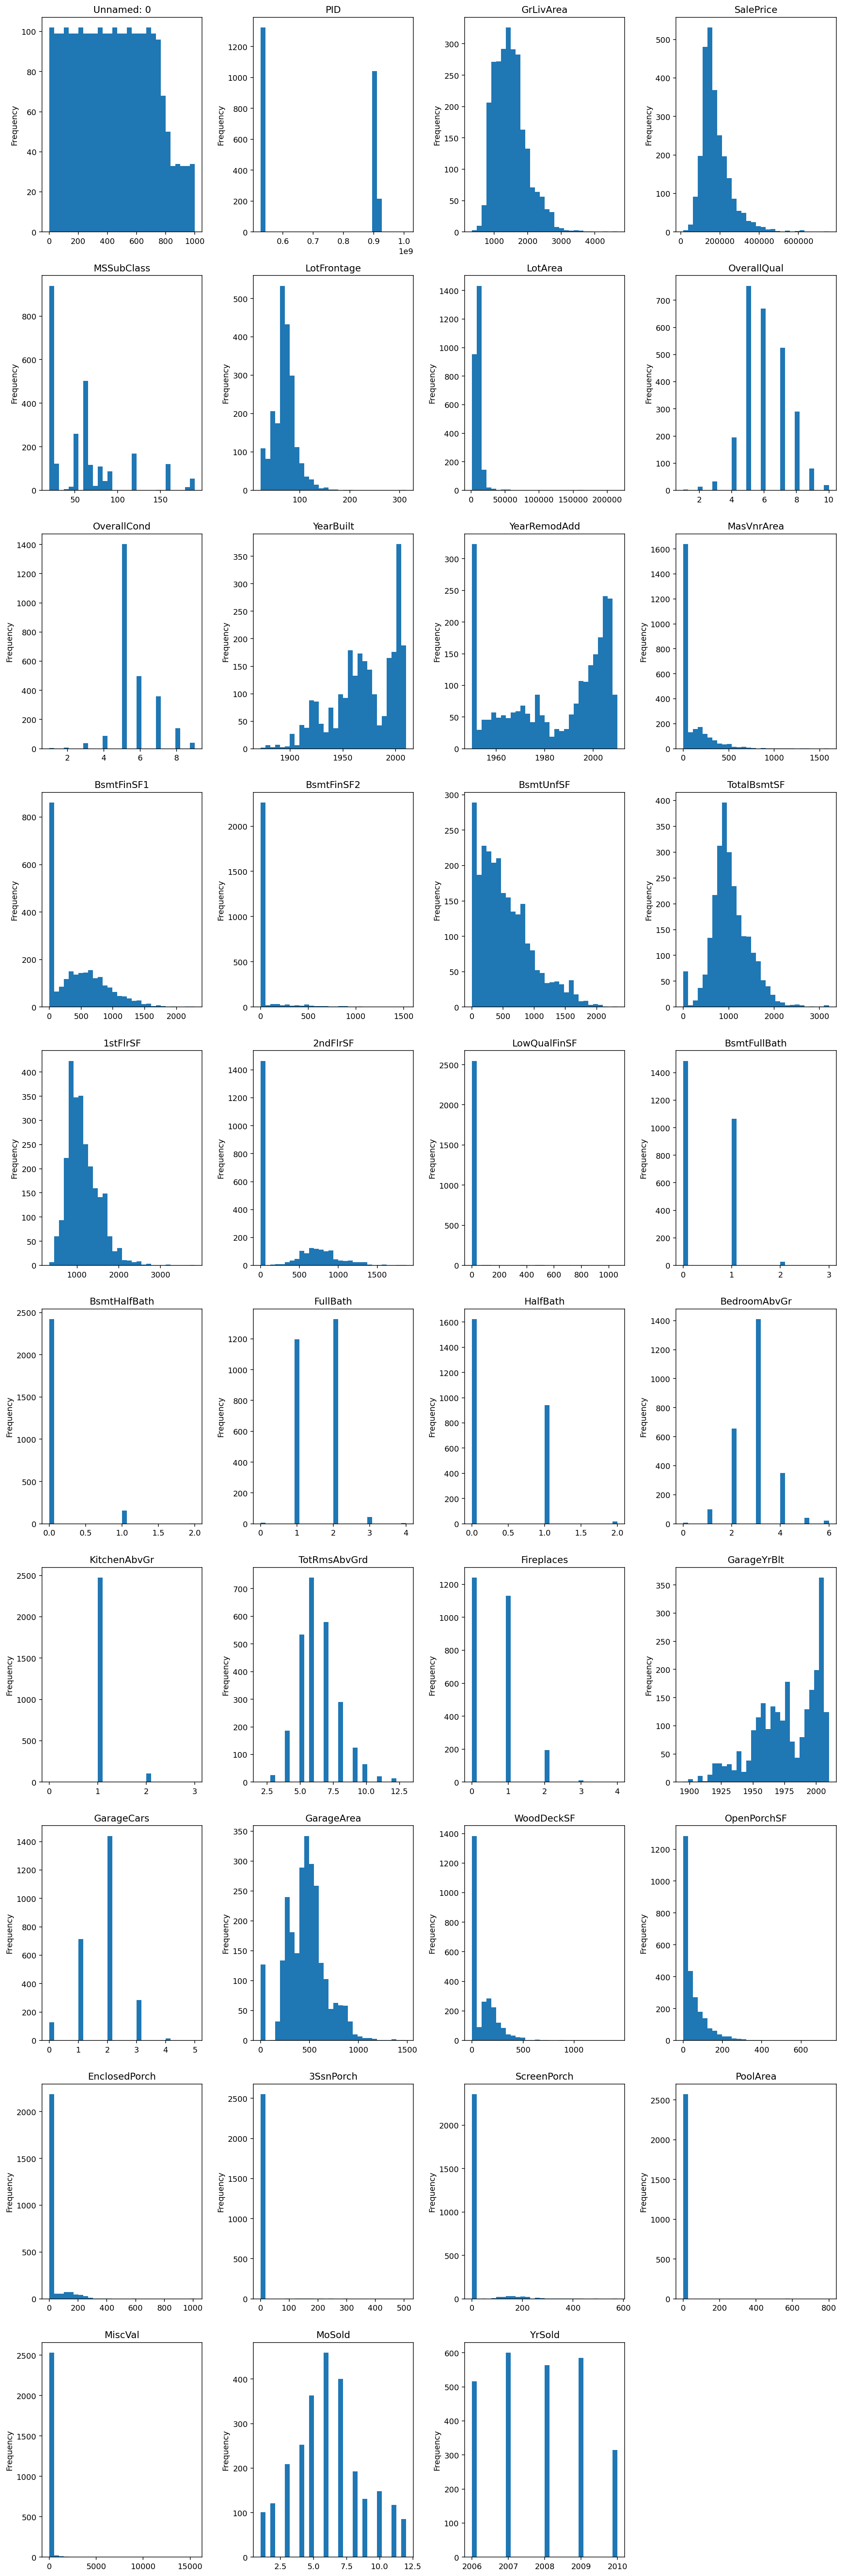

In [384]:
check_dist(df_numeric, 11,4) # checking distribution of numerical columns

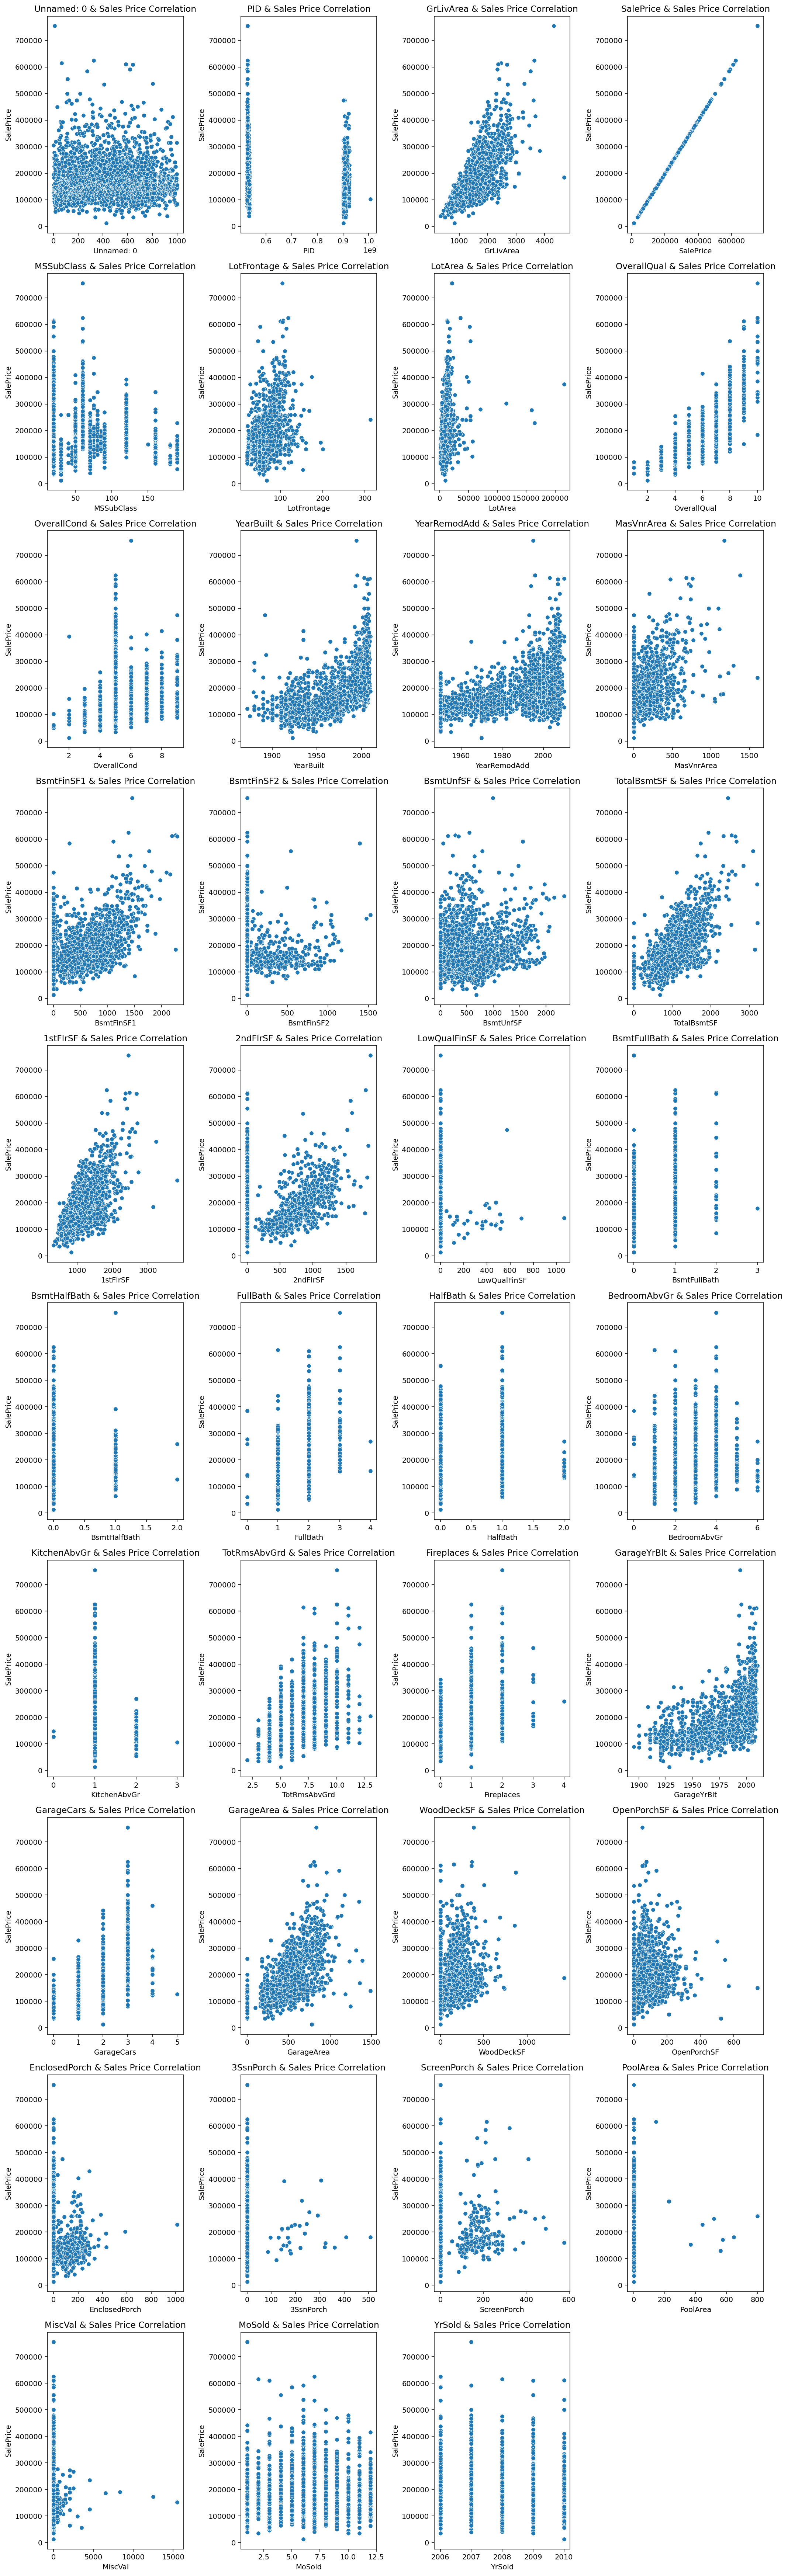

In [383]:
target_correlation(df_numeric, 10,4) #checking correlation with target (Home Price)

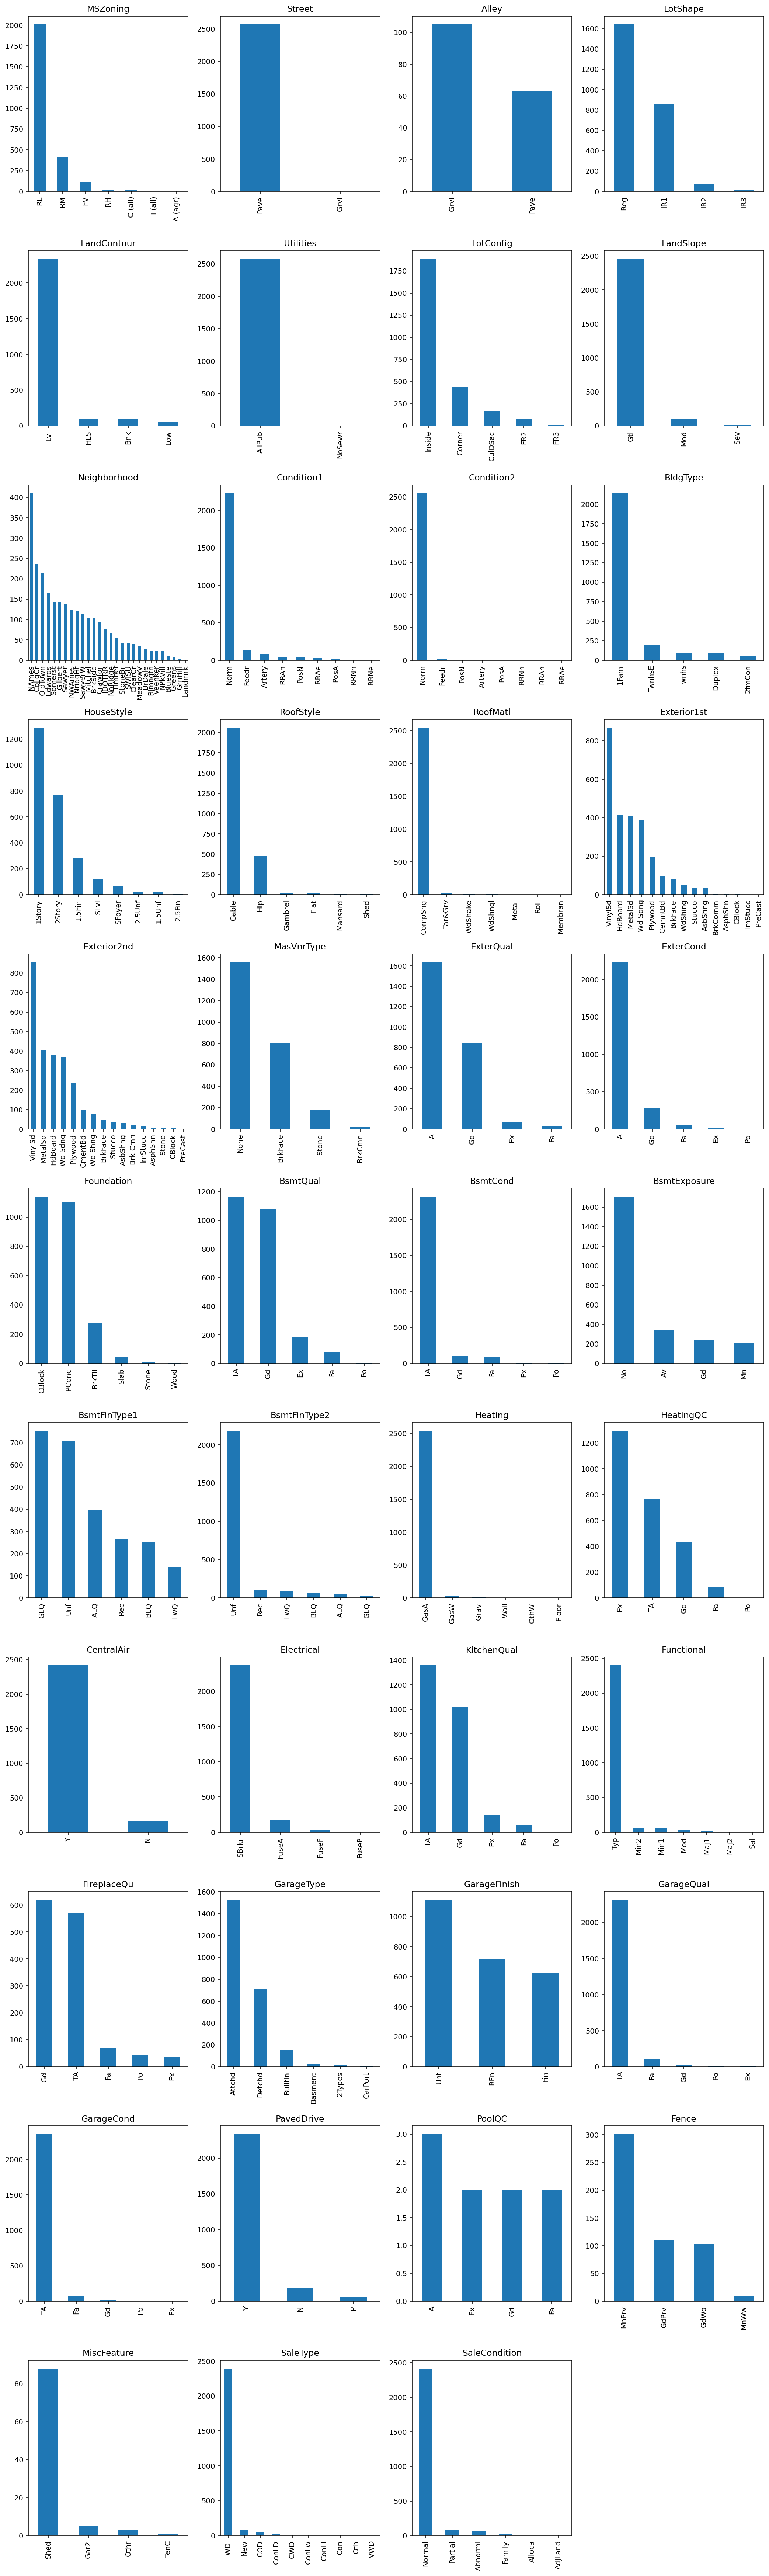

In [385]:
check_class_imbalance(df_object, 11,4) # checking class balance for categorical variables

In [ ]:
plt.figure(figsize=(20,12));
sns.heatmap(df_numeric.corr(), cmap="coolwarm", cbar=False, annot=True);

In [297]:
homeDF = preprocessed_DF(num_cols,ordinal_cols,nominal_cols,
             cols_to_drop, scaleType='standard') # preprocessed dataframe from utility.py (imputed, encoded, scaled)



In [298]:
homeDF.head()

GrLivArea  SalePrice  LotFrontage   LotArea  Neighborhood  Condition1  \
0  -1.289598     126000    -0.382860 -0.274468          21.0         2.0   
1  -0.894555     139500    -1.237817 -0.724294           7.0         2.0   
2  -0.992804     124900    -0.422469 -0.499689          11.0         2.0   
3  -0.915024     114000     0.483474 -0.242962          20.0         2.0   
4   0.366305     227000     0.030503 -0.211702          17.0         2.0   

   Condition2  OverallQual  OverallCond  YearBuilt  ...  _is_Mod  _is_Sal  \
0         2.0          5.0          5.0  -1.053847  ...        0        0   
1         2.0          4.0          4.0   0.460593  ...        0        0   
2         2.0          4.0          8.0  -1.356735  ...        0        0   
3         2.0          3.0          7.0  -2.366362  ...        0        0   
4         2.0          7.0          5.0   1.032715  ...        0        0   

   _is_Typ  _is_Attchd  _is_Basment  _is_BuiltIn  _is_CarPort  _is_Detchd  \
0        1           0            0            0            0           1   
1        1           1            0            0            0           0   
2        1           0            0            0            0           1   
3        1           0            0            0            0           1   
4        1           1            0            0            0           0   

   _is_1.0  _is_2.0  
0        0        1  
1        0        0  
2        0        1  
3        0        1  
4        0        0  

[5 rows x 180 columns]

In [447]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler


In [ ]:
homeDF.info() # not scaled
#2580 rows × 181 features


# Linear Regression (MLR) 
#### All Features Included (181 )

Train R2 Score is:  0.9203024579800732
Test Score is:  0.9096941453677929


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

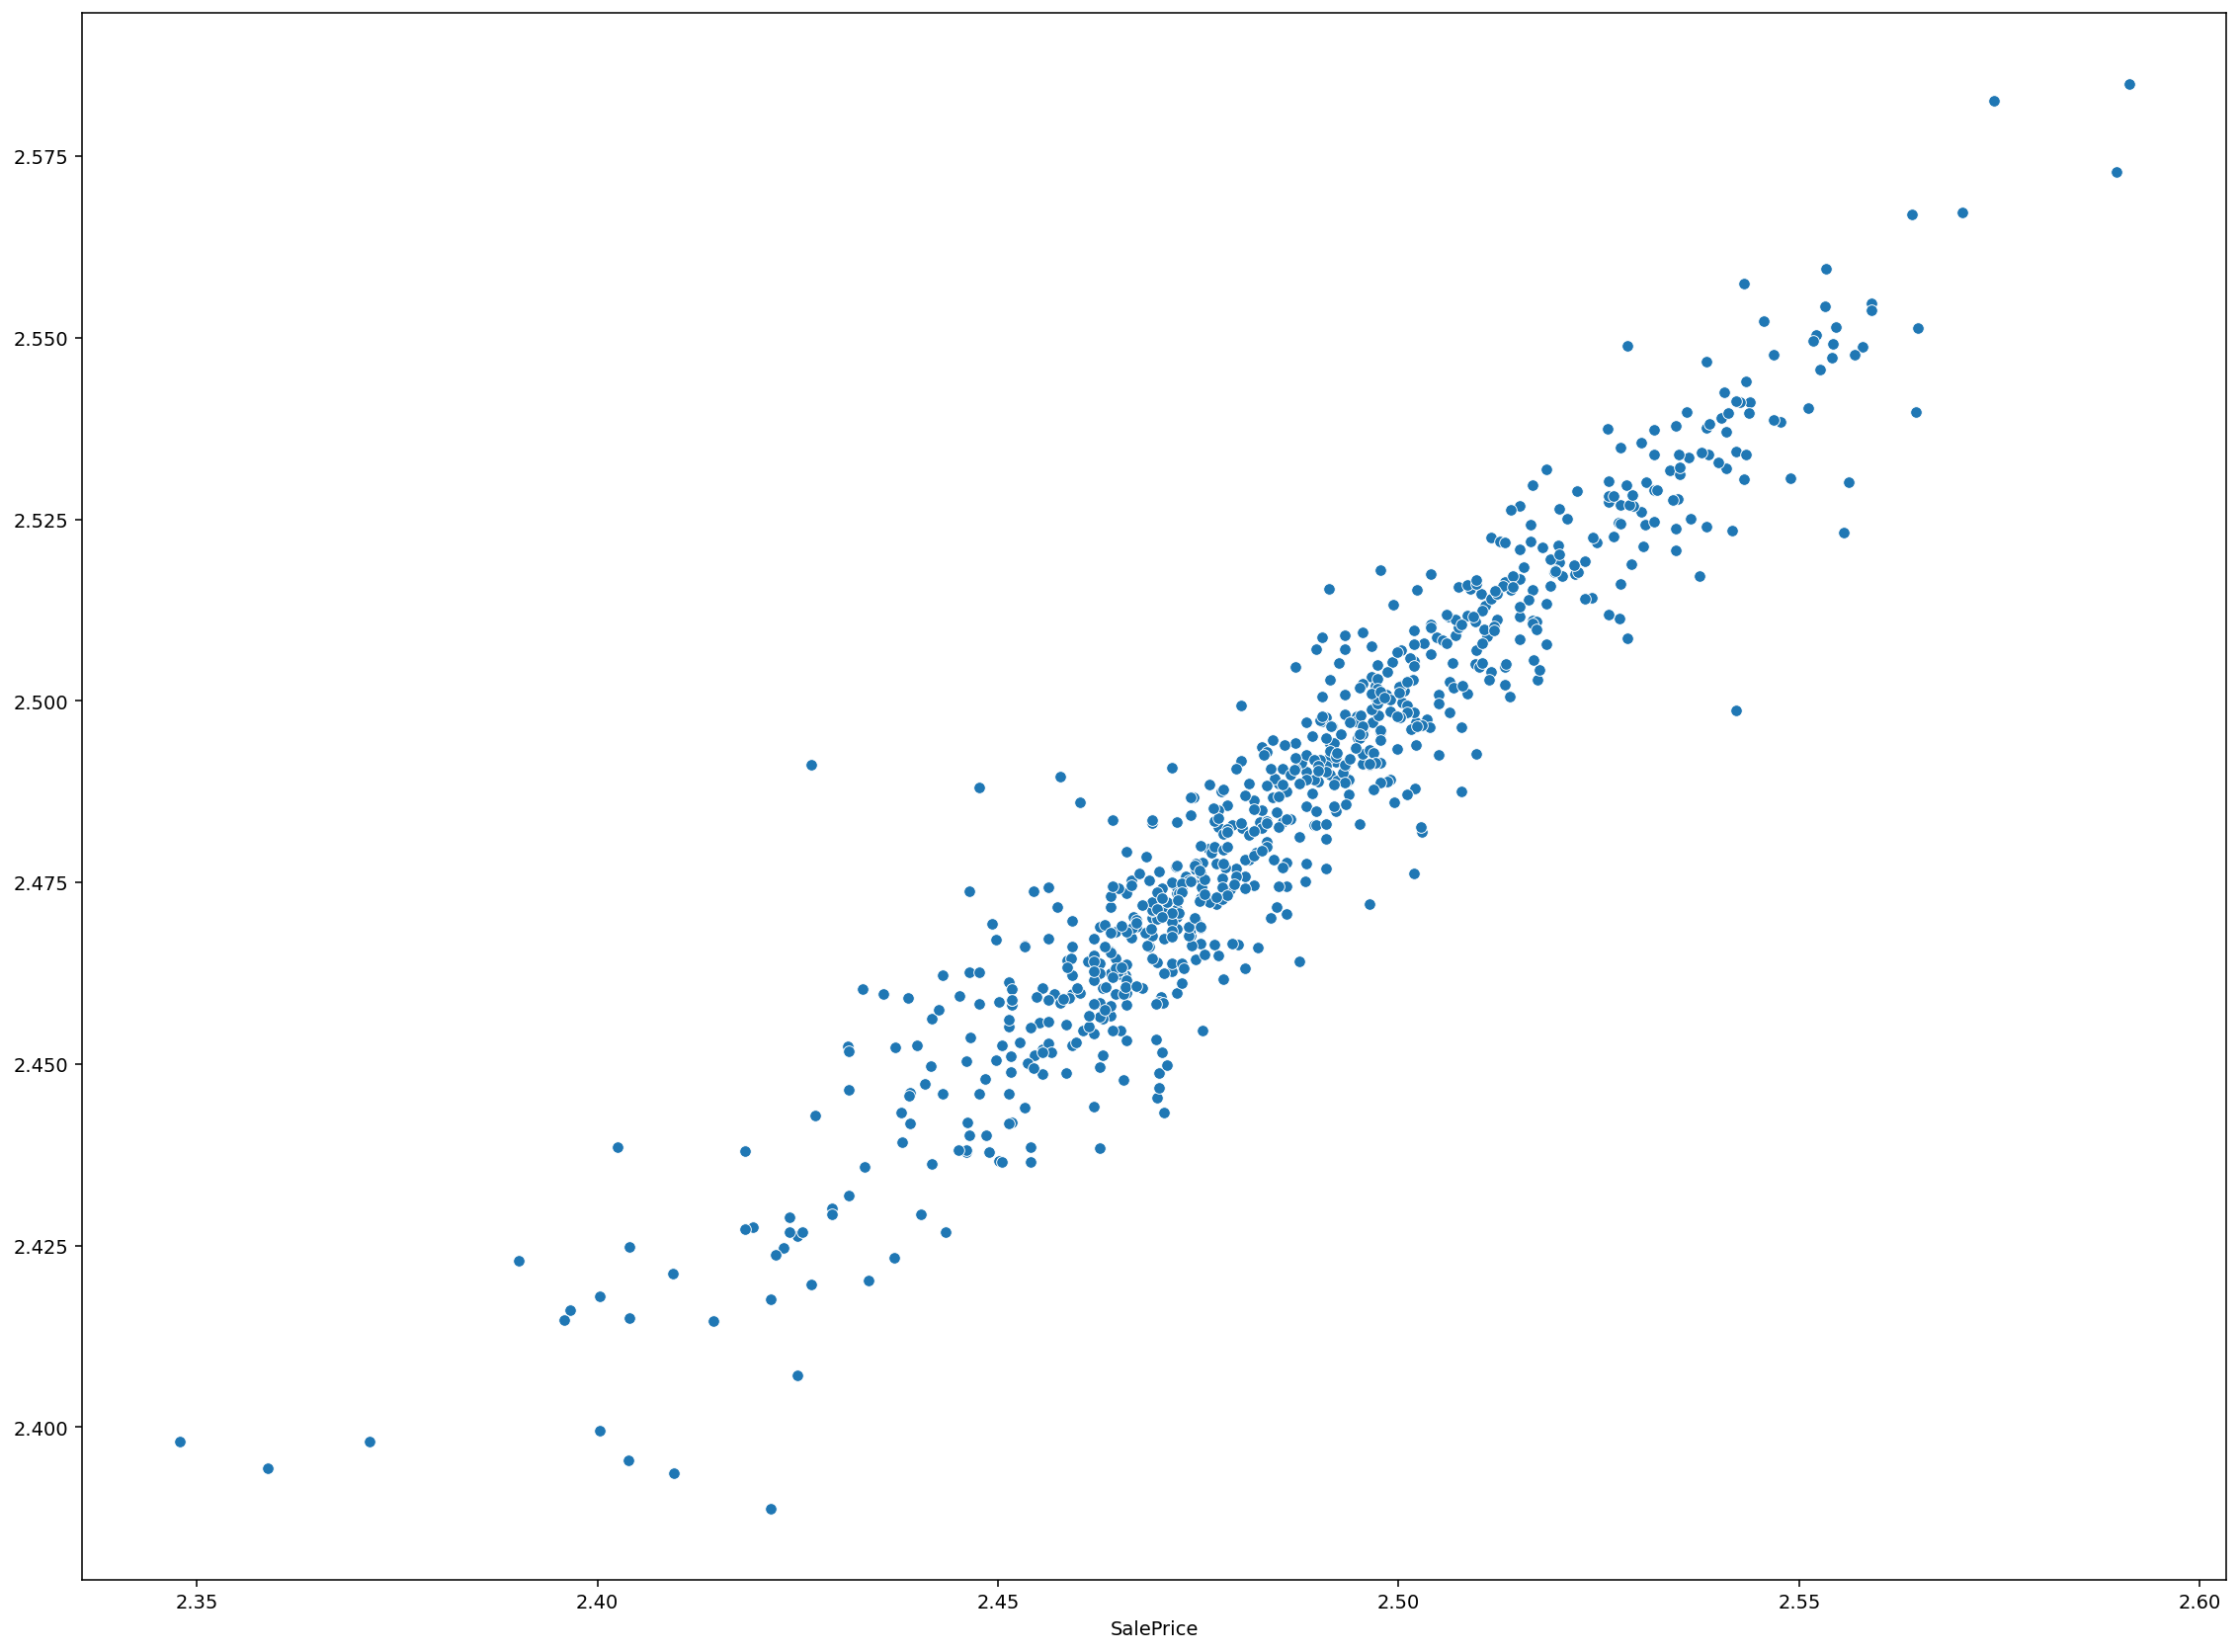

In [454]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor
from sklearn.metrics import r2_score

# Using all 181 features

y = np.log(homeDF['SalePrice']) #logged price
X = homeDF.drop('SalePrice', axis = 1) #Standard and Robust scalers give same result 
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X,y,test_size=.30, random_state=101)

mlr = LinearRegression()
mlr.fit(X_train_mlr, y_train_mlr)
print("Train R2 Score is: ", mlr.score(X_train_mlr, y_train_mlr))
y_pred_mlr = mlr.predict(X_test_mlr)
print("Test Score is: ", r2_score(y_test_mlr, y_pred_mlr))


sns.scatterplot(y_test_mlr, y_pred_mlr)
# sns.regplot(y_test_mlr, y_pred_mlr,);


In [455]:
import statsmodels.api as sm


'''

Using statsmodels to run a linear regression model with all features to understand coefficients and significane
level of all features

'''
x_const_mlr=sm.add_constant(X_train_mlr)
model = sm.OLS(y_train_mlr, x_const_mlr)
ols = model.fit()
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:44:04   Log-Likelihood:                 5921.4
No. Observations:                1806   AIC:                        -1.150e+04
Df Residuals:                    1637   BIC:                        -1.058e+04
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4281      0.010    143.267

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [417]:
pd.set_option('display.max_rows',999)
pd.DataFrame(ols.pvalues[ols.pvalues<0.05]) # analyzing Significance of coefficients. Some Feature Engineered 
# columns are performing well.

0
const          1.123421e-150
GrLivArea       9.190122e-03
LotArea         2.706014e-03
Condition2      7.424970e-04
OverallQual     2.467867e-41
OverallCond     8.403355e-30
YearBuilt       6.989120e-08
YearRemodAdd    1.392556e-02
ExterQual       9.820076e-04
ExterCond       1.139615e-02
BsmtFinSF1      3.356934e-04
BsmtFinSF2      3.239305e-04
BsmtUnfSF       3.845948e-04
TotalBsmtSF     1.834505e-03
HeatingQC       6.485089e-04
1stFlrSF       3.469748e-259
2ndFlrSF       7.393288e-280
LowQualFinSF    1.649557e-03
BsmtFullBath    1.444715e-02
FullBath        9.187827e-03
HalfBath        1.582073e-02
KitchenQual     1.088189e-03
TotRmsAbvGrd    2.294908e-02
Fireplaces      5.120612e-09
GarageCars      4.266987e-04
GarageCond      5.235816e-04
EnclosedPorch   9.709452e-03
ScreenPorch     3.968408e-05
TotSft          6.378573e-08
HasBsmntType2  1.086062e-146
_is_30          1.147579e-03
_is_80          2.757554e-02
_is_90          4.563828e-04
_is_C (all)     2.679489e-39
_is_FV         3.389719e-107
_is_I (all)     2.347821e-11
_is_RH          2.771503e-62
_is_RL         4.385916e-101
_is_RM          2.141783e-91
_is_IR2         1.786044e-02
_is_HLS         1.953322e-05
_is_Low         1.104127e-02
_is_Lvl         8.013589e-03
_is_Duplex      4.563828e-04
_is_SLvl        2.738484e-02
_is_Mansard     1.048748e-02
_is_Membran     3.697752e-03
_is_Metal       3.067883e-03
_is_Roll        2.712441e-03
_is_BrkFace     3.708567e-03
_is_CBlock      2.493636e-03
_is_PreCast     2.767228e-06
_is_AsphShn     2.508183e-02
_is_CBlock      1.928527e-03
_is_CmentBd     3.944718e-03
_is_HdBoard     4.791979e-02
_is_PreCast     2.767228e-06
_is_Wd Shng     4.752123e-02
_is_Slab        7.696223e-03
_is_Stone       2.631847e-02
_is_Wood        4.072260e-02
_is_LwQ         1.285334e-02
_is_Rec         4.014409e-02
_is_Unf        2.785037e-150
_is_OthW        4.039277e-02
_is_Y           6.960751e-05
_is_Maj2        1.423707e-02
_is_Sal         5.337762e-04
_is_Typ         9.001338e-03

In [13]:
homeDF_noScale = preprocessed_DF(num_cols,ordinal_cols,nominal_cols,
             cols_to_drop)

#Not scaled

In [18]:
homeDF_noScale

GrLivArea  SalePrice  LotFrontage  LotArea  Neighborhood  Condition1  \
0         856.0     126000    60.874427   7890.0          21.0         2.0   
1        1049.0     139500    42.000000   4235.0           7.0         2.0   
2        1001.0     124900    60.000000   6060.0          11.0         2.0   
3        1039.0     114000    80.000000   8146.0          20.0         2.0   
4        1665.0     227000    70.000000   8400.0          17.0         2.0   
...         ...        ...          ...      ...           ...         ...   
2575      952.0     121000    59.306615   8854.0           3.0         2.0   
2576     1733.0     139600    95.323995  13680.0           7.0         2.0   
2577     2002.0     145000    82.000000   6270.0           6.0         2.0   
2578     1842.0     217500    64.321897   8826.0           5.0         2.0   
2579     1911.0     215000    80.000000   9554.0          23.0         2.0   

      Condition2  OverallQual  OverallCond  YearBuilt  ...  _is_Mod  _is_Sal  \
0            2.0          5.0          5.0     1939.0  ...        0        0   
1            2.0          4.0          4.0     1984.0  ...        0        0   
2            2.0          4.0          8.0     1930.0  ...        0        0   
3            2.0          3.0          7.0     1900.0  ...        0        0   
4            2.0          7.0          5.0     2001.0  ...        0        0   
...          ...          ...          ...        ...  ...      ...      ...   
2575         2.0          5.0          5.0     1916.0  ...        0        0   
2576         2.0          2.0          4.0     1955.0  ...        0        0   
2577         2.0          4.0          5.0     1949.0  ...        0        0   
2578         2.0          6.0          4.0     2000.0  ...        0        0   
2579         2.0          7.0          4.0     1993.0  ...        0        0   

      _is_Typ  _is_Attchd  _is_Basment  _is_BuiltIn  _is_CarPort  _is_Detchd  \
0           1           0            0            0            0           1   
1           1           1            0            0            0           0   
2           1           0            0            0            0           1   
3           1           0            0            0            0           1   
4           1           1            0            0            0           0   
...       ...         ...          ...          ...          ...         ...   
2575        1           0            0            0            0           1   
2576        0           1            0            0            0           0   
2577        1           0            0            0            0           0   
2578        1           1            0            0            0           0   
2579        1           1            0            0            0           0   

      _is_1.0  _is_2.0  
0           0        1  
1           0        0  
2           0        1  
3           0        1  
4           0        0  
...       ...      ...  
2575        0        1  
2576        0        1  
2577        0        1  
2578        0        0  
2579        1        0  

[2580 rows x 180 columns]

# Lasso Penalized Regression 
#### All Features Used (181)

In [15]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import normalize

In [140]:
homeDF

GrLivArea  SalePrice  LotFrontage   LotArea  Neighborhood  Condition1  \
0     -0.933977     126000    -0.385851 -0.367240          21.0         2.0   
1     -0.623188     139500    -1.329573 -1.261484           7.0         2.0   
2     -0.700483     124900    -0.429573 -0.814973          11.0         2.0   
3     -0.639291     114000     0.570427 -0.304606          20.0         2.0   
4      0.368760     227000     0.070427 -0.242461          17.0         2.0   
...         ...        ...          ...       ...           ...         ...   
2575  -0.779388     121000    -0.464242 -0.131384           3.0         2.0   
2576   0.478261     139600     1.336627  1.049361           7.0         2.0   
2577   0.911433     145000     0.670427 -0.763594           6.0         2.0   
2578   0.653784     217500    -0.213478 -0.138235           5.0         2.0   
2579   0.764895     215000     0.570427  0.039880          23.0         2.0   

      Condition2  OverallQual  OverallCond  YearBuilt  ...  _is_Mod  _is_Sal  \
0            2.0          5.0          5.0  -0.717391  ...        0        0   
1            2.0          4.0          4.0   0.260870  ...        0        0   
2            2.0          4.0          8.0  -0.913043  ...        0        0   
3            2.0          3.0          7.0  -1.565217  ...        0        0   
4            2.0          7.0          5.0   0.630435  ...        0        0   
...          ...          ...          ...        ...  ...      ...      ...   
2575         2.0          5.0          5.0  -1.217391  ...        0        0   
2576         2.0          2.0          4.0  -0.369565  ...        0        0   
2577         2.0          4.0          5.0  -0.500000  ...        0        0   
2578         2.0          6.0          4.0   0.608696  ...        0        0   
2579         2.0          7.0          4.0   0.456522  ...        0        0   

      _is_Typ  _is_Attchd  _is_Basment  _is_BuiltIn  _is_CarPort  _is_Detchd  \
0           1           0            0            0            0           1   
1           1           1            0            0            0           0   
2           1           0            0            0            0           1   
3           1           0            0            0            0           1   
4           1           1            0            0            0           0   
...       ...         ...          ...          ...          ...         ...   
2575        1           0            0            0            0           1   
2576        0           1            0            0            0           0   
2577        1           0            0            0            0           0   
2578        1           1            0            0            0           0   
2579        1           1            0            0            0           0   

      _is_1.0  _is_2.0  
0           0        1  
1           0        0  
2           0        1  
3           0        1  
4           0        0  
...       ...      ...  
2575        0        1  
2576        0        1  
2577        0        1  
2578        0        0  
2579        1        0  

[2580 rows x 180 columns]

In [458]:
lasso = Lasso(random_state=101, fit_intercept=True,max_iter=2000)
y_lasso = np.log(homeDF['SalePrice']) #logged price
X_lasso = homeDF.drop('SalePrice', axis =1)
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso,y_lasso,test_size=.30, random_state=101)


In [460]:
param = [
    {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5]}

]

In [461]:
grid = GridSearchCV(lasso, param, scoring='r2', cv=5, return_train_score=True,verbose=5)


In [462]:
grid.fit(X_lasso,y_lasso)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..alpha=0.0001;, score=(train=0.926, test=0.855) total time=   0.1s
[CV 2/5] END ..alpha=0.0001;, score=(train=0.909, test=0.903) total time=   0.0s
[CV 3/5] END ..alpha=0.0001;, score=(train=0.907, test=0.916) total time=   0.0s
[CV 4/5] END ..alpha=0.0001;, score=(train=0.906, test=0.922) total time=   0.0s
[CV 5/5] END ..alpha=0.0001;, score=(train=0.907, test=0.923) total time=   0.0s
[CV 1/5] END ...alpha=0.001;, score=(train=0.903, test=0.834) total time=   0.0s
[CV 2/5] END ...alpha=0.001;, score=(train=0.887, test=0.886) total time=   0.0s
[CV 3/5] END ...alpha=0.001;, score=(train=0.885, test=0.901) total time=   0.0s
[CV 4/5] END ...alpha=0.001;, score=(train=0.885, test=0.903) total time=   0.0s
[CV 5/5] END ...alpha=0.001;, score=(train=0.884, test=0.906) total time=   0.0s
[CV 1/5] END ....alpha=0.01;, score=(train=0.669, test=0.638) total time=   0.0s
[CV 2/5] END ....alpha=0.01;, score=(train=0.656,

GridSearchCV(cv=5, estimator=Lasso(max_iter=2000, random_state=101),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5]}],
             return_train_score=True, scoring='r2', verbose=5)

In [463]:
grid.best_params_

{'alpha': 0.0001}

In [309]:
grid.cv_results_

{'mean_fit_time': array([0.29132099, 0.04687643, 0.01078763, 0.00757909, 0.00636754,
        0.00508156, 0.00500641, 0.00476522, 0.00503936]),
 'std_fit_time': array([0.00664107, 0.00357902, 0.00044313, 0.0001354 , 0.00017089,
        0.000134  , 0.00015244, 0.00015548, 0.00030433]),
 'mean_score_time': array([0.00236526, 0.00213804, 0.00161076, 0.00155454, 0.00158143,
        0.00154729, 0.00154996, 0.00193849, 0.0016438 ]),
 'std_score_time': array([3.26315893e-04, 1.30304302e-04, 7.51707730e-05, 3.20519708e-05,
        4.05807752e-05, 5.56831479e-05, 1.33352522e-05, 4.48831308e-04,
        1.01024746e-04]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.05},
  {'alpha': 0.1},
  {'alpha': 0.2},
  {'alpha': 0

In [482]:
print(f"Best score of the grid search is: {grid.best_score_} and best parameters are:  {grid.best_params_}")

Best score of the grid search is: 0.9037552846241595 and best parameters are:  {'alpha': 0.0001}


In [314]:
lasso.fit(X_lasso,y_lasso)

Lasso(max_iter=2000, random_state=101)

In [288]:
homeDF_noScale

GrLivArea  SalePrice  LotFrontage  LotArea  Neighborhood  Condition1  \
0         856.0     126000    60.874427   7890.0          21.0         2.0   
1        1049.0     139500    42.000000   4235.0           7.0         2.0   
2        1001.0     124900    60.000000   6060.0          11.0         2.0   
3        1039.0     114000    80.000000   8146.0          20.0         2.0   
4        1665.0     227000    70.000000   8400.0          17.0         2.0   
...         ...        ...          ...      ...           ...         ...   
2575      952.0     121000    59.306615   8854.0           3.0         2.0   
2576     1733.0     139600    95.323995  13680.0           7.0         2.0   
2577     2002.0     145000    82.000000   6270.0           6.0         2.0   
2578     1842.0     217500    64.321897   8826.0           5.0         2.0   
2579     1911.0     215000    80.000000   9554.0          23.0         2.0   

      Condition2  OverallQual  OverallCond  YearBuilt  ...  _is_Mod  _is_Sal  \
0            2.0          5.0          5.0     1939.0  ...        0        0   
1            2.0          4.0          4.0     1984.0  ...        0        0   
2            2.0          4.0          8.0     1930.0  ...        0        0   
3            2.0          3.0          7.0     1900.0  ...        0        0   
4            2.0          7.0          5.0     2001.0  ...        0        0   
...          ...          ...          ...        ...  ...      ...      ...   
2575         2.0          5.0          5.0     1916.0  ...        0        0   
2576         2.0          2.0          4.0     1955.0  ...        0        0   
2577         2.0          4.0          5.0     1949.0  ...        0        0   
2578         2.0          6.0          4.0     2000.0  ...        0        0   
2579         2.0          7.0          4.0     1993.0  ...        0        0   

      _is_Typ  _is_Attchd  _is_Basment  _is_BuiltIn  _is_CarPort  _is_Detchd  \
0           1           0            0            0            0           1   
1           1           1            0            0            0           0   
2           1           0            0            0            0           1   
3           1           0            0            0            0           1   
4           1           1            0            0            0           0   
...       ...         ...          ...          ...          ...         ...   
2575        1           0            0            0            0           1   
2576        0           1            0            0            0           0   
2577        1           0            0            0            0           0   
2578        1           1            0            0            0           0   
2579        1           1            0            0            0           0   

      _is_1.0  _is_2.0  
0           0        1  
1           0        0  
2           0        1  
3           0        1  
4           0        0  
...       ...      ...  
2575        0        1  
2576        0        1  
2577        0        1  
2578        0        0  
2579        1        0  

[2580 rows x 180 columns]

In [293]:
grid.best_score_

0.9109494492726757

In [456]:
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()

    # Create a column of feature names
    df['Feature Name'] = X_train_lasso.columns
   
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha, fit_intercept=True,max_iter=2000)
        
        # Fit the lasso regression
        lasso.fit(X_lasso,y_lasso)
        
        # Create a column name for that alpha value
        column_name = f'Alpha_{alpha}'

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
    
       
        
    # Return the datafram 
  
    return df[df['Alpha_0.001']>0]

In [457]:
lasso([0.001,0.01,0.05, 1,2,5,10])

Feature Name  Alpha_0.001  Alpha_0.01  Alpha_0.05   Alpha_1   Alpha_2  \
0        GrLivArea     0.070113    0.058019    0.006117  0.000000  0.000000   
1      LotFrontage     0.003536    0.013055    0.000000  0.000000  0.000000   
2          LotArea     0.016402    0.013960    0.000000  0.000000  0.000000   
6      OverallQual     0.067486    0.083609    0.109601  0.000000  0.000000   
7      OverallCond     0.047971    0.036833    0.000000  0.000000  0.000000   
8        YearBuilt     0.050982    0.064017    0.011163  0.000000  0.000000   
9     YearRemodAdd     0.013363    0.014788    0.011363  0.000000  0.000000   
10      MasVnrArea     0.000033    0.000033    0.000204  0.000858  0.000848   
12       ExterCond     0.011038    0.000000    0.000000  0.000000  0.000000   
15      BsmtFinSF1     0.030134    0.032518    0.006827  0.000000  0.000000   
16      BsmtFinSF2     0.000041    0.000061    0.000071  0.000046  0.000015   
20        1stFlrSF     0.007677    0.000908    0.000000  0.000000  0.000000   
23    BsmtFullBath     0.008924    0.002587    0.000000  0.000000  0.000000   
25        FullBath     0.002678    0.000000    0.000000  0.000000  0.000000   
26        HalfBath     0.003346    0.000000    0.000000  0.000000  0.000000   
30    TotRmsAbvGrd     0.011162    0.000000    0.000000  0.000000  0.000000   
31      Fireplaces     0.021435    0.021680    0.001432  0.000000  0.000000   
32     GarageYrBlt     0.007094    0.009241    0.000000  0.000000  0.000000   
33      GarageCars     0.020449    0.000000    0.000000  0.000000  0.000000   
34      GarageArea     0.013991    0.023869    0.019409  0.000000  0.000000   
36      GarageCond     0.014379    0.013128    0.000000  0.000000  0.000000   
37      WoodDeckSF     0.004325    0.002127    0.000000  0.000000  0.000000   
39   EnclosedPorch     0.000151    0.000068   -0.000169 -0.000279 -0.000062   
40       3SsnPorch     0.000113    0.000147    0.000262  0.000000  0.000000   
41     ScreenPorch     0.000214    0.000271    0.000362  0.000242  0.000000   
45          TotSft     0.073037    0.088283    0.108274  0.000000  0.000000   
47       NewGarage     0.002391    0.000000    0.000000  0.000000  0.000000   
51      PavedDrWay     0.017079    0.000000    0.000000  0.000000  0.000000   
56          _is_50     0.004426    0.000000   -0.000000 -0.000000 -0.000000   
69          _is_FV     0.071608    0.000000    0.000000  0.000000  0.000000   
72          _is_RL     0.044238    0.002311    0.000000  0.000000  0.000000   
78         _is_HLS     0.025082    0.000000    0.000000  0.000000  0.000000   
82     _is_CulDSac     0.000765    0.000000    0.000000  0.000000  0.000000   
112    _is_BrkFace     0.028708    0.000000    0.000000  0.000000  0.000000   
136    _is_VinylSd     0.003022    0.000000    0.000000  0.000000  0.000000   
140      _is_PConc     0.021628    0.000000    0.000000  0.000000  0.000000   
144         _is_Gd     0.016224    0.000000    0.000000  0.000000  0.000000   
148        _is_GLQ     0.004677    0.000000    0.000000  0.000000  0.000000   
162          _is_Y     0.046109    0.000000    0.000000  0.000000  0.000000   
171        _is_Typ     0.028242    0.000000    0.000000  0.000000  0.000000   
172     _is_Attchd     0.003901    0.000000    0.000000  0.000000  0.000000   

      Alpha_5  Alpha_10  
0    0.000000   0.00000  
1    0.000000   0.00000  
2    0.000000   0.00000  
6    0.000000   0.00000  
7    0.000000  -0.00000  
8    0.000000   0.00000  
9    0.000000   0.00000  
10   0.000782   0.00064  
12   0.000000   0.00000  
15   0.000000   0.00000  
16   0.000000   0.00000  
20   0.000000   0.00000  
23   0.000000   0.00000  
25   0.000000   0.00000  
26   0.000000   0.00000  
30   0.000000   0.00000  
31   0.000000   0.00000  
32   0.000000   0.00000  
33   0.000000   0.00000  
34   0.000000   0.00000  
36   0.000000   0.00000  
37   0.000000   0.00000  
39  -0.000000  -0.00000  
40   0.000000   0.00000  
41   0.000000   0.00000  
45   0.0000

In [ ]:
y_lasso = np.log(homeDF['SalePrice']) #logged price
X_lasso = homeDF_noScale('SalePrice', axis = 1) 
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso,y_lasso,test_size=.30, random_state=101)

mlr = lass()
mlr.fit(X_train_mlr, y_train_mlr)
print("Train R2 Score is: ", mlr.score(X_train_mlr, y_train_mlr))
y_pred_mlr = mlr.predict(X_test_mlr)
print("Test Score is: ", r2_score(y_test_mlr, y_pred_mlr))


sns.scatterplot(y_test_mlr, y_pred_mlr)

### Reducing Features based on EDA
#### Removing correlated numerical features and using feature engineered columns for some categorical columns (81 Features)

In [575]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [939]:
homes2 = homes.copy()
homes2.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           3  911128020       1001     124900          30  C (all)   
3           4  535377150       1039     114000          70       RL   
4           5  534177230       1665     227000          60       RL   

   LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0          NaN     7890   Pave   NaN      Reg         Lvl    AllPub    Corner   
1         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
2         60.0     6060   Pave   NaN      Reg         Lvl    AllPub    Inside   
3         80.0     8146   Pave   NaN      Reg         Lvl    AllPub    Corner   
4         70.0     8400   Pave   NaN      Reg         Lvl    AllPub    Inside   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl        SWISU       Norm       Norm     1Fam     1Story   
1       Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2       Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
3       Gtl      OldTown       Norm       Norm     1Fam     2Story   
4       Gtl       NWAmes       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            6       1939          1950     Gable  CompShg   
1            5            5       1984          1984     Gable  CompShg   
2            5            9       1930          2007       Hip  CompShg   
3            4            8       1900          2003     Gable  CompShg   
4            8            6       2001          2001     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     MetalSd     MetalSd       None         0.0        Gd        Gd   
4     VinylSd     VinylSd       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       238.0   
1     CBlock       Gd       TA           Mn          GLQ       552.0   
2     BrkTil       TA       TA           No          ALQ       737.0   
3     BrkTil       Fa       TA           No          Unf         0.0   
4      PConc       Gd       TA           No          GLQ       643.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      618.0        856.0    GasA        TA   
1          ALQ       393.0      104.0       1049.0    GasA        TA   
2          Unf         0.0      100.0        837.0    GasA        Ex   
3          Unf         0.0      405.0        405.0    GasA        Gd   
4          Unf         0.0      167.0        810.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
0          Y      SBrkr       856         0             0           1.0   
1          Y      SBrkr      1049         0             0           1.0   
2          Y      SBrkr      1001         0             0           0.0   
3          Y      SBrkr       717       322             0           0.0   
4          Y      SBrkr       810       855             0           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         2         0             2             1          Gd   
2           0.0         1         0             2             1          Gd   
3           0.0         1         0             2             1          TA   
4           0.0         2         1             3             1         

In [940]:
# Feature Engineering

#Home year built and remodeled influence on price is exponential after 1990/2000
homes2['newBltRmd'] = np.where((homes2.YearBuilt > 1980) & (homes2.YearRemodAdd > 1990), 1, 0) 
homes2['BltAft1980'] = np.where(homes2.YearBuilt>1990,1,0)
homes2['RmdlAft2000'] = np.where(homes2.YearRemodAdd>1990,1,0)
# MasVnrType has minimal correlation with price. 
homes2['hasMasVnr'] = np.where((homes2.MasVnrArea > 0) & (homes2.MasVnrType != 'None'), 1, 0) 
# Combined squarefeet of house
homes2['TotSft'] = homes2['TotalBsmtSF']+homes2['1stFlrSF'] +homes2['2ndFlrSF']
#If basement unfinished
homes2['UnfBsmt'] = np.where(homes2.BsmtUnfSF>0, 1,0)
#if the garage is new (built after 2000)
homes2['NewGarage'] = np.where(homes2['GarageYrBlt']>2000,1,0)
#if home has wooddeck (sft doesn't matter)
homes2['HasWoodDk'] = np.where(homes2['WoodDeckSF']>0,1,0)
#if a home has a porch (type doesn't matter)
homes2['HasPorch'] = np.where((homes2.OpenPorchSF > 0) | (homes2.EnclosedPorch > 0) |(homes2['3SsnPorch'] > 0) |(homes2.ScreenPorch > 0) , 1, 0) 
#if a home has a pool (only 9 observations match this condition)
homes2['HasPool'] = np.where(homes2.PoolArea>0,1,0)
#if driveway is paved (most of them are)
homes2['PavedDrWay'] = np.where(homes2.PavedDrive  == 'Y',1,0) #combined minority classes
#if a home has a basement
homes2['HasBsmntType2'] = np.where(homes2.BsmtFinSF2 >0, 1,0)


In [783]:
homes2.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           3  911128020       1001     124900          30  C (all)   
3           4  535377150       1039     114000          70       RL   
4           5  534177230       1665     227000          60       RL   

   LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0          NaN     7890   Pave   NaN      Reg         Lvl    AllPub    Corner   
1         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
2         60.0     6060   Pave   NaN      Reg         Lvl    AllPub    Inside   
3         80.0     8146   Pave   NaN      Reg         Lvl    AllPub    Corner   
4         70.0     8400   Pave   NaN      Reg         Lvl    AllPub    Inside   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl        SWISU       Norm       Norm     1Fam     1Story   
1       Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2       Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
3       Gtl      OldTown       Norm       Norm     1Fam     2Story   
4       Gtl       NWAmes       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            6       1939          1950     Gable  CompShg   
1            5            5       1984          1984     Gable  CompShg   
2            5            9       1930          2007       Hip  CompShg   
3            4            8       1900          2003     Gable  CompShg   
4            8            6       2001          2001     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     MetalSd     MetalSd       None         0.0        Gd        Gd   
4     VinylSd     VinylSd       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       238.0   
1     CBlock       Gd       TA           Mn          GLQ       552.0   
2     BrkTil       TA       TA           No          ALQ       737.0   
3     BrkTil       Fa       TA           No          Unf         0.0   
4      PConc       Gd       TA           No          GLQ       643.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      618.0        856.0    GasA        TA   
1          ALQ       393.0      104.0       1049.0    GasA        TA   
2          Unf         0.0      100.0        837.0    GasA        Ex   
3          Unf         0.0      405.0        405.0    GasA        Gd   
4          Unf         0.0      167.0        810.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
0          Y      SBrkr       856         0             0           1.0   
1          Y      SBrkr      1049         0             0           1.0   
2          Y      SBrkr      1001         0             0           0.0   
3          Y      SBrkr       717       322             0           0.0   
4          Y      SBrkr       810       855             0           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         2         0             2             1          Gd   
2           0.0         1         0             2             1          Gd   
3           0.0         1         0             2             1          TA   
4           0.0         2         1             3             1         

In [784]:
# homes2.fillna(1.0,inplace=True, axis = 1)

In [941]:
reduced_feat = ['GrLivArea',
 'YearBuilt',
 'TotSft',
 'YearRemodAdd',
 'TotalBsmtSF',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Neighborhood',
 'GarageCars',
 'MSSubClass',
 'Condition1',
 'OverallQual',
 'GarageQual',
 'MSZoning',
 'MoSold',
 'LotShape',
 'LandContour',
 'LotConfig',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'HeatingQC',
 'Functional',
 'BsmtFinType1',
 'GarageType',
 'Fireplaces',
 'BltAft1980',
  'RmdlAft2000',
'LotFrontage',
'LotArea'
   ]

In [942]:
homes2 = homes2[reduced_feat]
homes2.info() #35 columns before encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     2580 non-null   int64  
 1   YearBuilt     2580 non-null   int64  
 2   TotSft        2579 non-null   float64
 3   YearRemodAdd  2580 non-null   int64  
 4   TotalBsmtSF   2579 non-null   float64
 5   BsmtHalfBath  2578 non-null   float64
 6   FullBath      2580 non-null   int64  
 7   HalfBath      2580 non-null   int64  
 8   KitchenAbvGr  2580 non-null   int64  
 9   TotRmsAbvGrd  2580 non-null   int64  
 10  Neighborhood  2580 non-null   object 
 11  GarageCars    2579 non-null   float64
 12  MSSubClass    2580 non-null   int64  
 13  Condition1    2580 non-null   object 
 14  OverallQual   2580 non-null   int64  
 15  GarageQual    2451 non-null   object 
 16  MSZoning      2580 non-null   object 
 17  MoSold        2580 non-null   int64  
 18  LotShape      2580 non-null 

In [877]:
homes['HouseStyle']

0       1Story
1       1Story
2       1Story
3       2Story
4       2Story
         ...  
2575    1.5Unf
2576    1Story
2577    2Story
2578    2Story
2579    2Story
Name: HouseStyle, Length: 2580, dtype: object

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

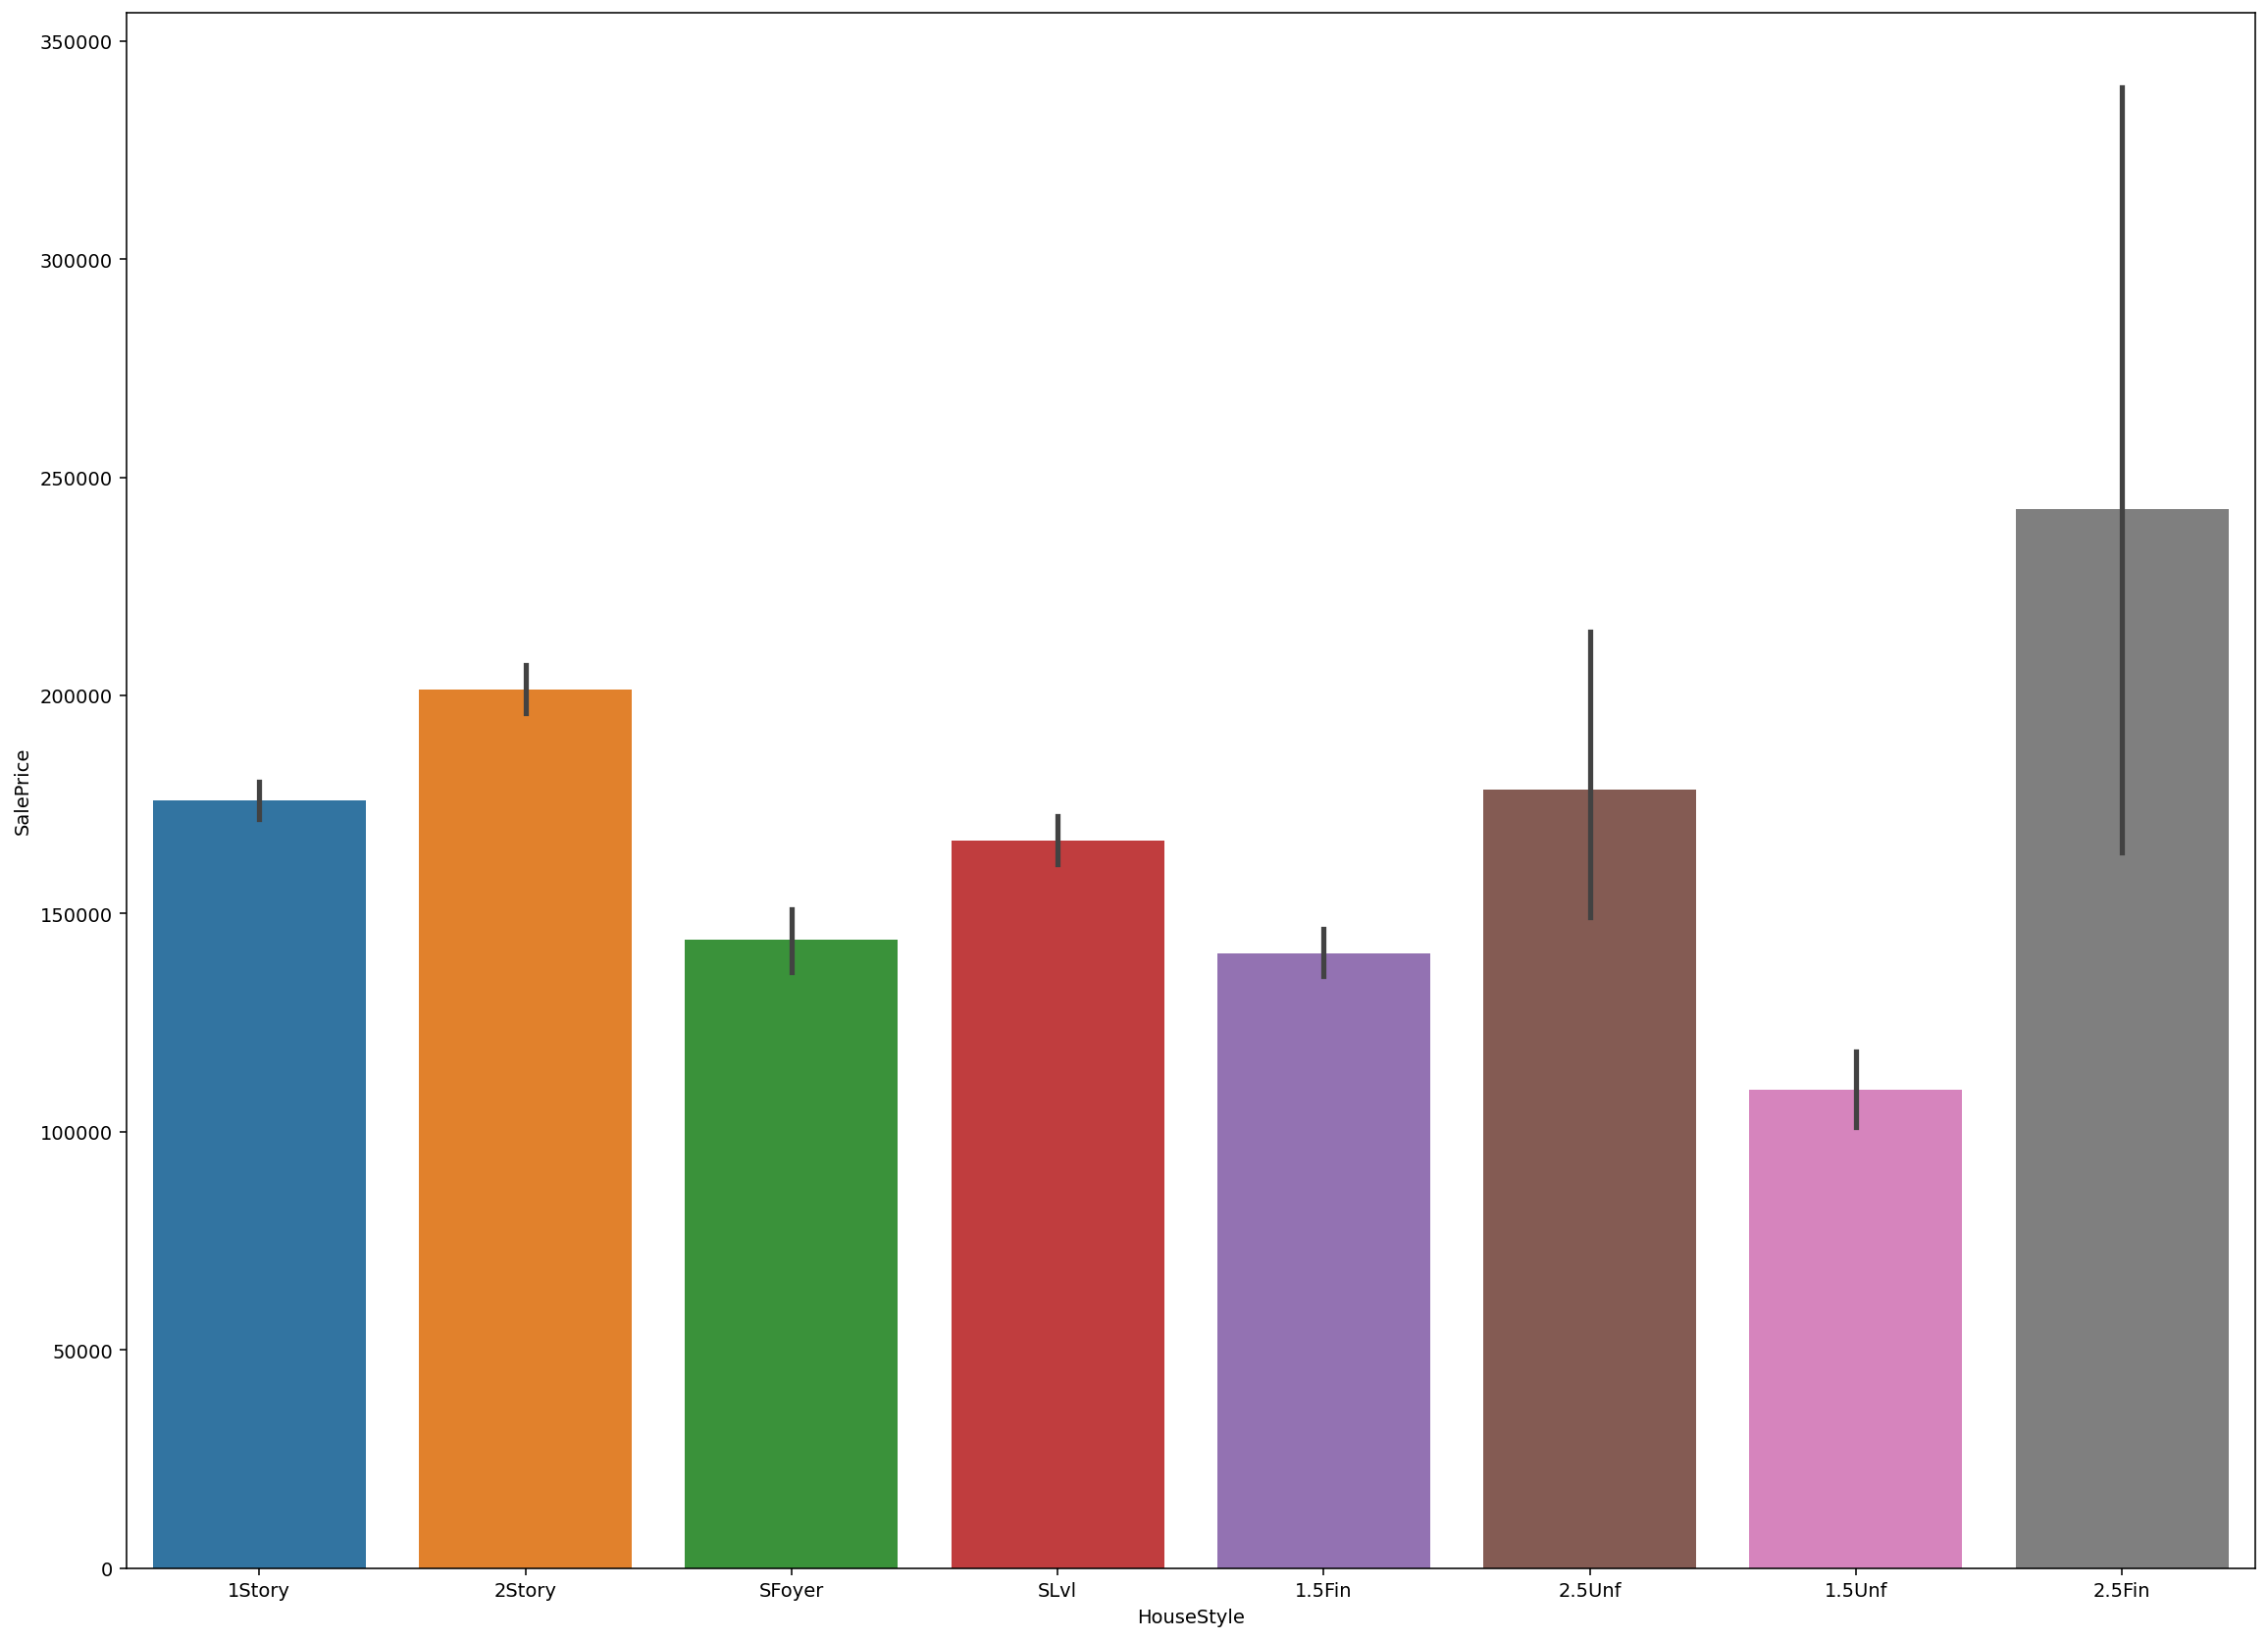

In [880]:
sns.barplot(homes['HouseStyle'], y = homes['SalePrice'])

In [879]:
homes

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0              1  909176150        856     126000          30       RL   
1              2  905476230       1049     139500         120       RL   
2              3  911128020       1001     124900          30  C (all)   
3              4  535377150       1039     114000          70       RL   
4              5  534177230       1665     227000          60       RL   
...          ...        ...        ...        ...         ...      ...   
2575         759  903205040        952     121000          30       RL   
2576         760  905402060       1733     139600          20       RL   
2577         761  909275030       2002     145000          90       RH   
2578         762  907192040       1842     217500          60       RL   
2579         763  906223180       1911     215000          60       RL   

      LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0             NaN     7890   Pave   NaN      Reg         Lvl    AllPub   
1            42.0     4235   Pave   NaN      Reg         Lvl    AllPub   
2            60.0     6060   Pave   NaN      Reg         Lvl    AllPub   
3            80.0     8146   Pave   NaN      Reg         Lvl    AllPub   
4            70.0     8400   Pave   NaN      Reg         Lvl    AllPub   
...           ...      ...    ...   ...      ...         ...       ...   
2575          NaN     8854   Pave   NaN      Reg         Lvl    AllPub   
2576          NaN    13680   Pave   NaN      IR1         Lvl    AllPub   
2577         82.0     6270   Pave   NaN      Reg         HLS    AllPub   
2578          NaN     8826   Pave   NaN      Reg         Lvl    AllPub   
2579         80.0     9554   Pave   NaN      IR1         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Corner       Gtl        SWISU       Norm       Norm     1Fam   
1       Inside       Gtl      Edwards       Norm       Norm   TwnhsE   
2       Inside       Gtl       IDOTRR       Norm       Norm     1Fam   
3       Corner       Gtl      OldTown       Norm       Norm     1Fam   
4       Inside       Gtl       NWAmes       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
2575    Inside       Gtl      BrkSide       Norm       Norm     1Fam   
2576   CulDSac       Gtl      Edwards       Norm       Norm     1Fam   
2577    Inside       Gtl      Crawfor       Norm       Norm   Duplex   
2578    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
2579    Inside       Gtl      SawyerW       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        1Story            6            6       1939          1950     Gable   
1        1Story            5            5       1984          1984     Gable   
2        1Story            5            9       1930          2007       Hip   
3        2Story            4            8       1900          2003     Gable   
4        2Story            8            6       2001          2001     Gable   
...         ...          ...          ...        ...           ...       ...   
2575     1.5Unf            6            6       1916          1950     Gable   
2576     1Story            3            5       1955          1955       Hip   
2577     2Story            5            6       1949          1950     Gable   
2578     2Story            7            5       2000          2000     Gable   
2579     2Story            8            5       1993          1994     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   
1     CompShg     HdBoard     HdBoard    BrkFace       149.0        Gd   
2     CompShg     MetalSd     MetalSd       None         0.0        Gd   
3     CompShg     MetalSd     MetalSd       None         0.0        Gd   
4     CompShg     VinylSd     Vi

In [787]:
homes2.head()

GrLivArea  YearBuilt  TotSft  YearRemodAdd  TotalBsmtSF  BsmtHalfBath  \
0        856       1939  1712.0          1950        856.0           0.0   
1       1049       1984  2098.0          1984       1049.0           0.0   
2       1001       1930  1838.0          2007        837.0           0.0   
3       1039       1900  1444.0          2003        405.0           0.0   
4       1665       2001  2475.0          2001        810.0           0.0   

   FullBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd Neighborhood  GarageCars  \
0         1         0             1             4        SWISU         2.0   
1         2         0             1             5      Edwards         1.0   
2         1         0             1             5       IDOTRR         1.0   
3         1         0             1             6      OldTown         1.0   
4         2         1             1             6       NWAmes         2.0   

   MSSubClass Condition1  OverallQual GarageQual MSZoning  MoSold LotShape  \
0          30       Norm            6         TA       RL       3      Reg   
1         120       Norm            5         TA       RL       2      Reg   
2          30       Norm            5         TA  C (all)      11      Reg   
3          70       Norm            4         TA       RL       5      Reg   
4          60       Norm            8         TA       RL      11      Reg   

  LandContour LotConfig BldgType HouseStyle RoofStyle Exterior1st ExterQual  \
0         Lvl    Corner     1Fam     1Story     Gable     Wd Sdng        TA   
1         Lvl    Inside   TwnhsE     1Story     Gable     HdBoard        Gd   
2         Lvl    Inside     1Fam     1Story       Hip     MetalSd        Gd   
3         Lvl    Corner     1Fam     2Story     Gable     MetalSd        Gd   
4         Lvl    Inside     1Fam     2Story     Gable     VinylSd        Gd   

  Foundation BsmtQual HeatingQC Functional BsmtFinType1 GarageType  \
0     CBlock       TA        TA        Typ          Rec     Detchd   
1     CBlock       Gd        TA        Typ          GLQ     Attchd   
2     BrkTil       TA        Ex        Typ          ALQ     Detchd   
3     BrkTil       Fa        Gd        Typ          Unf     Detchd   
4      PConc       Gd        Ex        Typ          GLQ     Attchd   

   Fireplaces  BltAft1980  RmdlAft2000  LotFrontage  LotArea  
0           1           0            0          NaN     7890  
1           0           0            0         42.0     4235  
2           0           0            1         60.0     6060  
3           0           0            1         80.0     8146  
4           0           1            1         70.0     8400

In [943]:
homes2.fillna(1.0,inplace=True, axis = 1)

In [944]:
homes2_numerical = ['GrLivArea','YearBuilt','TotSft','YearRemodAdd','TotalBsmtSF','MoSold','BltAft1980',
                   'RmdlAft2000','LotFrontage','LotArea']
homes2_ordinal = ['BsmtHalfBath','FullBath','HalfBath','KitchenAbvGr','TotRmsAbvGrd','Neighborhood','GarageCars',
                 'Condition1','OverallQual','GarageQual','MSZoning','ExterQual','BsmtQual','HeatingQC','Functional',
                  'Fireplaces']
homes2_nominal =['MSSubClass','LotShape','LandContour','LotConfig','BldgType','HouseStyle','RoofStyle','Exterior1st',
               'Foundation', 'BsmtFinType1','GarageType']


In [945]:
homes2[homes2_ordinal] = homes2[homes2_ordinal].astype(str)

In [946]:
transform = ColumnTransformer(
        [("ordinal", OrdinalEncoder(),homes2_ordinal)
        ]) # num_feat -- > numerical features (EDA)


In [947]:
homes2.head()

GrLivArea  YearBuilt  TotSft  YearRemodAdd  TotalBsmtSF BsmtHalfBath  \
0        856       1939  1712.0          1950        856.0          0.0   
1       1049       1984  2098.0          1984       1049.0          0.0   
2       1001       1930  1838.0          2007        837.0          0.0   
3       1039       1900  1444.0          2003        405.0          0.0   
4       1665       2001  2475.0          2001        810.0          0.0   

  FullBath HalfBath KitchenAbvGr TotRmsAbvGrd Neighborhood GarageCars  \
0        1        0            1            4        SWISU        2.0   
1        2        0            1            5      Edwards        1.0   
2        1        0            1            5       IDOTRR        1.0   
3        1        0            1            6      OldTown        1.0   
4        2        1            1            6       NWAmes        2.0   

   MSSubClass Condition1 OverallQual GarageQual MSZoning  MoSold LotShape  \
0          30       Norm           6         TA       RL       3      Reg   
1         120       Norm           5         TA       RL       2      Reg   
2          30       Norm           5         TA  C (all)      11      Reg   
3          70       Norm           4         TA       RL       5      Reg   
4          60       Norm           8         TA       RL      11      Reg   

  LandContour LotConfig BldgType HouseStyle RoofStyle Exterior1st ExterQual  \
0         Lvl    Corner     1Fam     1Story     Gable     Wd Sdng        TA   
1         Lvl    Inside   TwnhsE     1Story     Gable     HdBoard        Gd   
2         Lvl    Inside     1Fam     1Story       Hip     MetalSd        Gd   
3         Lvl    Corner     1Fam     2Story     Gable     MetalSd        Gd   
4         Lvl    Inside     1Fam     2Story     Gable     VinylSd        Gd   

  Foundation BsmtQual HeatingQC Functional BsmtFinType1 GarageType Fireplaces  \
0     CBlock       TA        TA        Typ          Rec     Detchd          1   
1     CBlock       Gd        TA        Typ          GLQ     Attchd          0   
2     BrkTil       TA        Ex        Typ          ALQ     Detchd          0   
3     BrkTil       Fa        Gd        Typ          Unf     Detchd          0   
4      PConc       Gd        Ex        Typ          GLQ     Attchd          0   

   BltAft1980  RmdlAft2000  LotFrontage  LotArea  
0           0            0          1.0     7890  
1           0            0         42.0     4235  
2           0            1         60.0     6060  
3           0            1         80.0     8146  
4           1            1         70.0     8400

In [948]:
homes2[homes2_ordinal] = transform.fit_transform(homes2) # transforing numerical and ordinal columns

In [949]:

# scale_ordinal.fit_transform(homes2[homes2_ordinal])

In [950]:
nominal_encoded_cols = pd.get_dummies(homes2[homes2_nominal], drop_first=True)

In [951]:
homes2.drop(homes2_nominal, inplace=True, axis = 1)

In [952]:
homes2 = pd.concat([homes2, nominal_encoded_cols], axis = 1)

In [953]:
homes2.info() # 82 columns. down from the original 181 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 84 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GrLivArea            2580 non-null   int64  
 1   YearBuilt            2580 non-null   int64  
 2   TotSft               2580 non-null   float64
 3   YearRemodAdd         2580 non-null   int64  
 4   TotalBsmtSF          2580 non-null   float64
 5   BsmtHalfBath         2580 non-null   float64
 6   FullBath             2580 non-null   float64
 7   HalfBath             2580 non-null   float64
 8   KitchenAbvGr         2580 non-null   float64
 9   TotRmsAbvGrd         2580 non-null   float64
 10  Neighborhood         2580 non-null   float64
 11  GarageCars           2580 non-null   float64
 12  Condition1           2580 non-null   float64
 13  OverallQual          2580 non-null   float64
 14  GarageQual           2580 non-null   float64
 15  MSZoning             2580 non-null   f

In [799]:
homes2.isna().sum()

GrLivArea              0
YearBuilt              0
TotSft                 0
YearRemodAdd           0
TotalBsmtSF            0
BsmtHalfBath           0
FullBath               0
HalfBath               0
KitchenAbvGr           0
TotRmsAbvGrd           0
Neighborhood           0
GarageCars             0
Condition1             0
OverallQual            0
GarageQual             0
MSZoning               0
MoSold                 0
ExterQual              0
BsmtQual               0
HeatingQC              0
Functional             0
Fireplaces             0
BltAft1980             0
RmdlAft2000            0
LotFrontage            0
LotArea                0
MSSubClass             0
LotShape_IR2           0
LotShape_IR3           0
LotShape_Reg           0
LandContour_HLS        0
LandContour_Low        0
LandContour_Lvl        0
LotConfig_CulDSac      0
LotConfig_FR2          0
LotConfig_FR3          0
LotConfig_Inside       0
BldgType_2fmCon        0
BldgType_Duplex        0
BldgType_Twnhs         0


In [800]:
scale = StandardScaler()
homes2[homes2.columns] = scale.fit_transform(homes2)

In [954]:
homes2.head()

GrLivArea  YearBuilt  TotSft  YearRemodAdd  TotalBsmtSF  BsmtHalfBath  \
0        856       1939  1712.0          1950        856.0           0.0   
1       1049       1984  2098.0          1984       1049.0           0.0   
2       1001       1930  1838.0          2007        837.0           0.0   
3       1039       1900  1444.0          2003        405.0           0.0   
4       1665       2001  2475.0          2001        810.0           0.0   

   FullBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  Neighborhood  GarageCars  \
0       1.0       0.0           1.0           6.0          21.0         2.0   
1       2.0       0.0           1.0           7.0           7.0         1.0   
2       1.0       0.0           1.0           7.0          11.0         1.0   
3       1.0       0.0           1.0           8.0          20.0         1.0   
4       2.0       1.0           1.0           8.0          17.0         2.0   

   Condition1  OverallQual  GarageQual  MSZoning  MoSold  ExterQual  BsmtQual  \
0         2.0          6.0         5.0       5.0       3        3.0       5.0   
1         2.0          5.0         5.0       5.0       2        2.0       3.0   
2         2.0          5.0         5.0       1.0      11        2.0       5.0   
3         2.0          4.0         5.0       5.0       5        2.0       2.0   
4         2.0          8.0         5.0       5.0      11        2.0       3.0   

   HeatingQC  Functional  Fireplaces  BltAft1980  RmdlAft2000  LotFrontage  \
0        4.0         6.0         1.0           0            0          1.0   
1        4.0         6.0         0.0           0            0         42.0   
2        0.0         6.0         0.0           0            1         60.0   
3        2.0         6.0         0.0           0            1         80.0   
4        0.0         6.0         0.0           1            1         70.0   

   LotArea  MSSubClass  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0     7890          30             0             0             1   
1     4235         120             0             0             1   
2     6060          30             0             0             1   
3     8146          70             0             0             1   
4     8400          60             0             0             1   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4                0                0                1                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  BldgType_2fmCon  \
0              0              0                 0                0   
1              0              0                 1                0   
2              0              0                 1                0   
3              0              0                 0                0   
4              0              0                 1                0   

   BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0                0               0                0                  0   
1                0               0                1                  0   
2                0               0                0                  0   
3                0               0                0                  0   
4                0               0                0                  0   

   HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  \
0                  1                  0                  0                  0   
1                  1                  0                  0                  0   
2                  1                  0                  0                  0   
3                  0                  0                  0       

Train R2 Score is:  0.8744070194062684
Test Score is:  0.8815127032401798


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

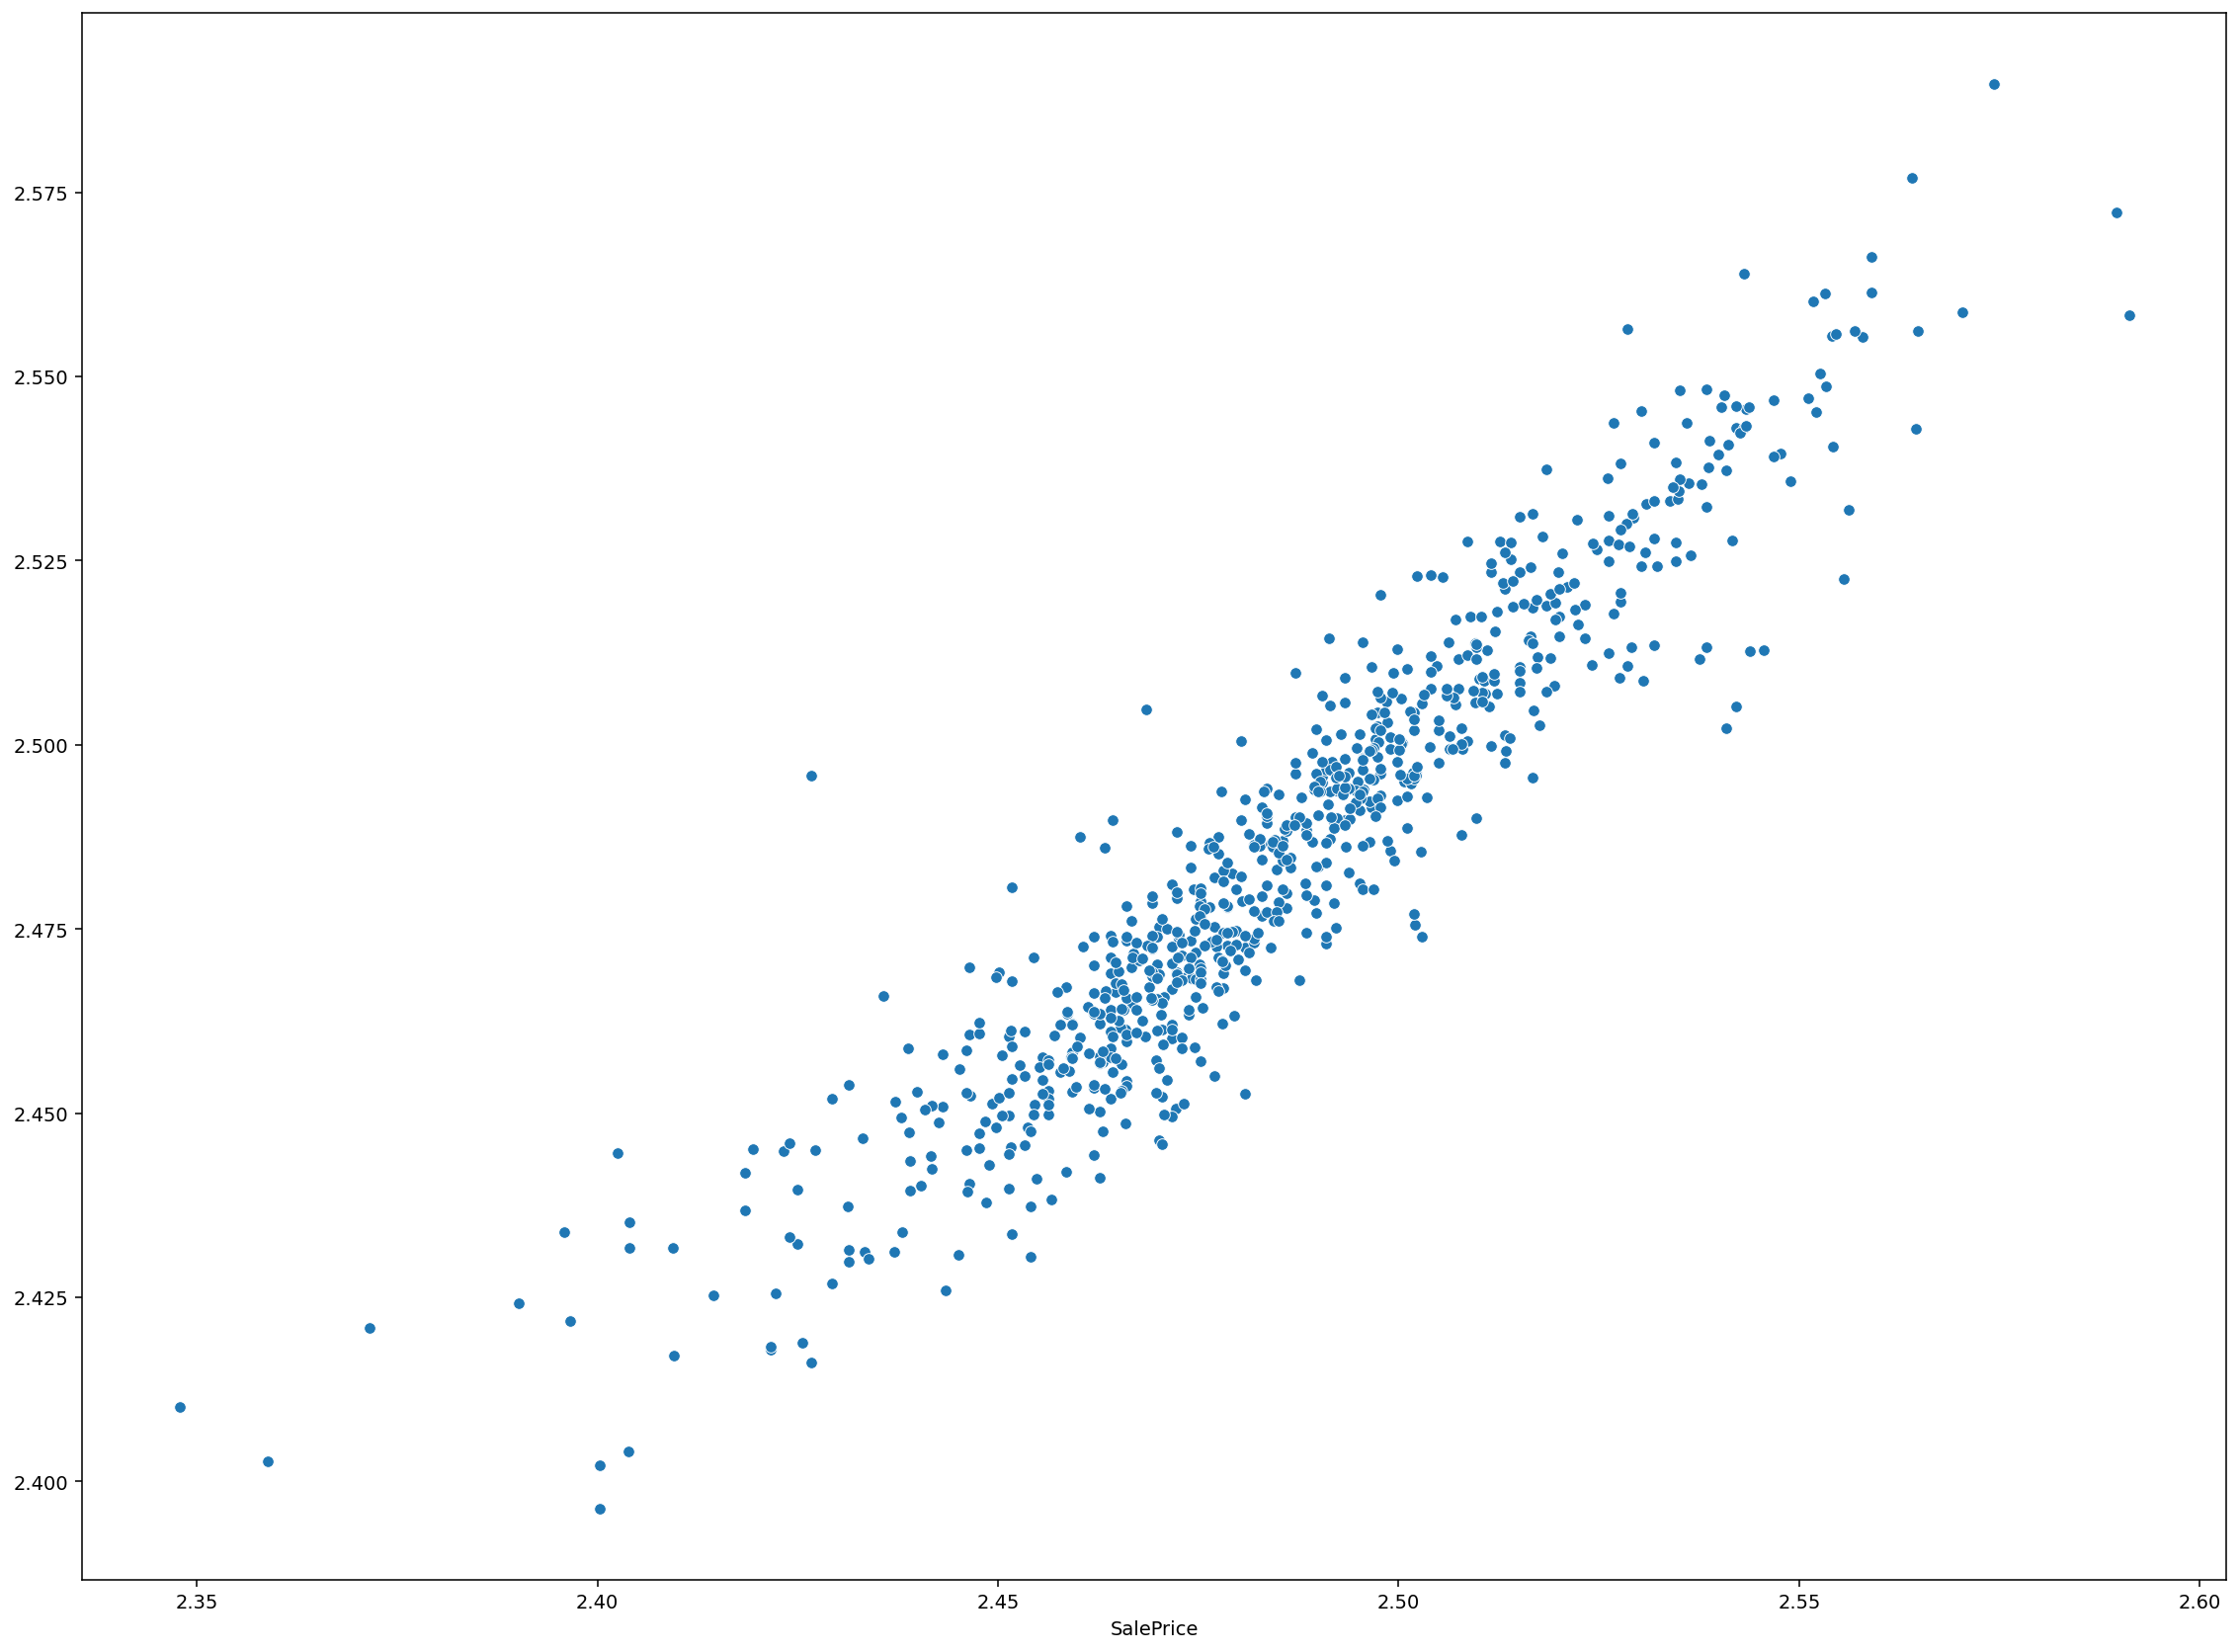

In [802]:
y = np.log(homeDF['SalePrice']) #logged price
X = homes2 #Standard and Robust scalers give same result 
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X,y,test_size=.30, random_state=101)

mlr = LinearRegression()
mlr.fit(X_train_mlr, y_train_mlr)
print("Train R2 Score is: ", mlr.score(X_train_mlr, y_train_mlr))
y_pred_mlr = mlr.predict(X_test_mlr)
print("Test Score is: ", r2_score(y_test_mlr, y_pred_mlr))


sns.scatterplot(y_test_mlr, y_pred_mlr)

In [803]:
lasso2 = Lasso(random_state=101, fit_intercept=True,max_iter=2000)
y_lasso2 = np.log(homeDF['SalePrice']) #logged price
X_lasso2 = homes2
X_train_lasso2, X_test_lasso2, y_train_lasso2, y_test_lasso2 = train_test_split(X_lasso2,y_lasso2,test_size=.30, random_state=101)

param2 = [
    {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5]}

]
grid2 = GridSearchCV(lasso2, param2, scoring='r2', cv=5, return_train_score=True,verbose=5)


In [804]:
grid2.fit(X_train_lasso2,y_train_lasso2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..alpha=0.0001;, score=(train=0.873, test=0.841) total time=   0.0s
[CV 2/5] END ..alpha=0.0001;, score=(train=0.865, test=0.892) total time=   0.0s
[CV 3/5] END ..alpha=0.0001;, score=(train=0.872, test=0.847) total time=   0.0s
[CV 4/5] END ..alpha=0.0001;, score=(train=0.888, test=0.807) total time=   0.0s
[CV 5/5] END ..alpha=0.0001;, score=(train=0.864, test=0.885) total time=   0.0s
[CV 1/5] END ...alpha=0.001;, score=(train=0.853, test=0.842) total time=   0.0s
[CV 2/5] END ...alpha=0.001;, score=(train=0.843, test=0.884) total time=   0.0s
[CV 3/5] END ...alpha=0.001;, score=(train=0.853, test=0.840) total time=   0.0s
[CV 4/5] END ...alpha=0.001;, score=(train=0.868, test=0.797) total time=   0.0s
[CV 5/5] END ...alpha=0.001;, score=(train=0.843, test=0.874) total time=   0.0s
[CV 1/5] END ....alpha=0.01;, score=(train=0.656, test=0.633) total time=   0.0s
[CV 2/5] END ....alpha=0.01;, score=(train=0.636,

GridSearchCV(cv=5, estimator=Lasso(max_iter=2000, random_state=101),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5]}],
             return_train_score=True, scoring='r2', verbose=5)

In [805]:
print(f"Best score of the grid search is: {grid2.best_score_} and best parameters are:  {grid2.best_params_}")
#low alpha paramater being best indicates that running regular MLR model is more ideal

Best score of the grid search is: 0.8543257586073979 and best parameters are:  {'alpha': 0.0001}


# SVR

#### For test purpose only
 - Since The dataset is linear, it makes no sense to use  SVR as it is computentionally heavy and would have results similar to Lasso/MLR

In [563]:
y_svr = np.log(homeDF['SalePrice'])
X_svr = homes2

In [564]:
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr,y_svr, test_size=.30, random_state=101)

In [567]:
svr = SVR()

In [570]:
svr_param = [
 
    {'C': np.linspace(0.001,0.01,5),
     'kernel': ['linear'],
    'epsilon': [0.001,0.01,0.1,0.2,0.4,1,2,5]}
    
#     {'C': [1.5, 10, 20],
#      'gamma': np.linspace(1e-4, 1e-2, 10),
#      'kernel': ['linear'],
#     'epsilon': [0.1,0.2,0.5,0.3]}
]

In [571]:
grid_svr = GridSearchCV(svr, svr_param, scoring='r2', cv=3, return_train_score=True,verbose=5)


In [572]:
grid_svr.fit(X_train_svr,y_train_svr)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3] END C=0.01, epsilon=0.001, kernel=linear;, score=(train=0.860, test=0.864) total time=   1.2s
[CV 2/3] END C=0.01, epsilon=0.001, kernel=linear;, score=(train=0.862, test=0.856) total time=   1.3s
[CV 3/3] END C=0.01, epsilon=0.001, kernel=linear;, score=(train=0.875, test=0.835) total time=   1.0s
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=(train=0.864, test=0.865) total time=   0.4s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=(train=0.866, test=0.859) total time=   0.4s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=(train=0.879, test=0.830) total time=   0.4s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=(train=-1.729, test=-2.478) total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=(train=-2.491, test=-2.345) total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=linear;, score=(train=-0.431, test=-0.317) total time=   0.0s
[CV 1/3] END C

[CV 2/3] END C=0.6733333333333333, epsilon=0.001, kernel=linear;, score=(train=0.864, test=0.857) total time=  46.7s
[CV 3/3] END C=0.6733333333333333, epsilon=0.001, kernel=linear;, score=(train=0.873, test=0.836) total time=  31.3s
[CV 1/3] END C=0.6733333333333333, epsilon=0.01, kernel=linear;, score=(train=0.867, test=0.862) total time=  25.0s
[CV 2/3] END C=0.6733333333333333, epsilon=0.01, kernel=linear;, score=(train=0.868, test=0.853) total time=  22.9s
[CV 3/3] END C=0.6733333333333333, epsilon=0.01, kernel=linear;, score=(train=0.879, test=0.833) total time=  19.6s
[CV 1/3] END C=0.6733333333333333, epsilon=0.1, kernel=linear;, score=(train=-1.729, test=-2.478) total time=   0.0s
[CV 2/3] END C=0.6733333333333333, epsilon=0.1, kernel=linear;, score=(train=-2.491, test=-2.345) total time=   0.0s
[CV 3/3] END C=0.6733333333333333, epsilon=0.1, kernel=linear;, score=(train=-0.431, test=-0.317) total time=   0.0s
[CV 1/3] END C=0.6733333333333333, epsilon=0.2, kernel=linear;, sco

[CV 1/3] END C=1.3366666666666667, epsilon=0.001, kernel=linear;, score=(train=0.859, test=0.851) total time= 1.0min
[CV 2/3] END C=1.3366666666666667, epsilon=0.001, kernel=linear;, score=(train=0.860, test=0.852) total time=  40.5s
[CV 3/3] END C=1.3366666666666667, epsilon=0.001, kernel=linear;, score=(train=0.870, test=0.825) total time=  46.4s
[CV 1/3] END C=1.3366666666666667, epsilon=0.01, kernel=linear;, score=(train=0.864, test=0.856) total time=  57.5s
[CV 2/3] END C=1.3366666666666667, epsilon=0.01, kernel=linear;, score=(train=0.865, test=0.852) total time=  33.7s
[CV 3/3] END C=1.3366666666666667, epsilon=0.01, kernel=linear;, score=(train=0.875, test=0.829) total time=  41.6s
[CV 1/3] END C=1.3366666666666667, epsilon=0.1, kernel=linear;, score=(train=-1.729, test=-2.478) total time=   0.0s
[CV 2/3] END C=1.3366666666666667, epsilon=0.1, kernel=linear;, score=(train=-2.491, test=-2.345) total time=   0.0s
[CV 3/3] END C=1.3366666666666667, epsilon=0.1, kernel=linear;, sco

[CV 1/3] END C=2.0, epsilon=0.001, kernel=linear;, score=(train=0.860, test=0.851) total time=  59.4s
[CV 2/3] END C=2.0, epsilon=0.001, kernel=linear;, score=(train=0.859, test=0.857) total time=  47.5s
[CV 3/3] END C=2.0, epsilon=0.001, kernel=linear;, score=(train=0.863, test=0.822) total time=  47.8s
[CV 1/3] END C=2.0, epsilon=0.01, kernel=linear;, score=(train=0.861, test=0.850) total time=  45.2s
[CV 2/3] END C=2.0, epsilon=0.01, kernel=linear;, score=(train=0.857, test=0.851) total time=  51.6s
[CV 3/3] END C=2.0, epsilon=0.01, kernel=linear;, score=(train=0.871, test=0.821) total time=  51.9s
[CV 1/3] END C=2.0, epsilon=0.1, kernel=linear;, score=(train=-1.729, test=-2.478) total time=   0.0s
[CV 2/3] END C=2.0, epsilon=0.1, kernel=linear;, score=(train=-2.491, test=-2.345) total time=   0.0s
[CV 3/3] END C=2.0, epsilon=0.1, kernel=linear;, score=(train=-0.431, test=-0.317) total time=   0.0s
[CV 1/3] END C=2.0, epsilon=0.2, kernel=linear;, score=(train=-3.086, test=-4.203) to

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': array([0.01      , 0.23111111, 0.45222222, 0.67333333, 0.89444444,
       1.11555556, 1.33666667, 1.55777778, 1.77888889, 2.        ]),
                          'epsilon': [0.001, 0.01, 0.1, 0.2, 0.4, 1, 2, 5],
                          'kernel': ['linear']}],
             return_train_score=True, scoring='r2', verbose=5)

In [574]:
print(f"Best score of the grid search is: {grid_svr.best_score_} and best parameters are:  {grid_svr.best_params_}")


Best score of the grid search is: 0.8518980852293018 and best parameters are:  {'C': 0.01, 'epsilon': 0.001, 'kernel': 'linear'}


# Gradient Boosting

In [917]:
homes2

GrLivArea  YearBuilt    TotSft  YearRemodAdd  TotalBsmtSF  BsmtHalfBath  \
0     -1.289598  -1.053847 -1.055607     -1.647539    -0.430389     -0.255495   
1     -0.894555   0.460593 -0.549901      0.012109     0.030353     -0.255495   
2     -0.992804  -1.356735 -0.890532      1.134812    -0.475747     -0.255495   
3     -0.915024  -2.366362 -1.406719      0.939559    -1.507045     -0.255495   
4      0.366305   1.032715 -0.055986      0.841933    -0.540203     -0.255495   
...         ...        ...       ...           ...          ...           ...   
2575  -1.093100  -1.827894 -0.804064     -1.647539    -0.201211     -0.255495   
2576   0.505490  -0.515379 -1.028094     -1.403473    -2.473887     -0.255495   
2577   1.056093  -0.717305  0.635757     -1.647539    -0.084235     -0.255495   
2578   0.728597   0.999061  0.405176      0.793120    -0.122431     -0.255495   
2579   0.869830   0.763481  0.223070      0.500240    -0.618982     -0.255495   

      FullBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  Neighborhood  \
0    -1.009265 -0.757892     -0.199051     -0.973902      0.944829   
1     0.823179 -0.757892     -0.199051     -0.467214     -1.023406   
2    -1.009265 -0.757892     -0.199051     -0.467214     -0.461053   
3    -1.009265 -0.757892     -0.199051      0.039475      0.804241   
4     0.823179  1.245552     -0.199051      0.039475      0.382476   
...        ...       ...           ...           ...           ...   
2575 -1.009265 -0.757892     -0.199051     -0.973902     -1.585759   
2576  0.823179 -0.757892     -0.199051      1.052852     -1.023406   
2577  0.823179 -0.757892      4.738949      1.052852     -1.163994   
2578  0.823179  1.245552     -0.199051      0.546163     -1.304582   
2579  0.823179  1.245552     -0.199051      1.052852      1.226005   

      GarageCars  Condition1  OverallQual  GarageQual  MSZoning    MoSold  \
0       0.342180   -0.045332     0.017747    0.324634  0.008914 -1.180008   
1      -1.011846   -0.045332    -0.697698    0.324634  0.008914 -1.554522   
2      -1.011846   -0.045332    -0.697698    0.324634 -4.832892  1.816101   
3      -1.011846   -0.045332    -1.413144    0.324634  0.008914 -0.430981   
4       0.342180   -0.045332     1.448639    0.324634  0.008914  1.816101   
...          ...         ...          ...         ...       ...       ...   
2575   -1.011846   -0.045332     0.017747   -2.103062  0.008914 -0.430981   
2576    0.342180   -0.045332    -2.128590    0.324634  0.008914 -0.056467   
2577    1.696207   -0.045332    -0.697698    0.324634 -1.201537  0.692560   
2578    0.342180   -0.045332     0.733193    0.324634  0.008914  0.318046   
2579    0.342180   -0.045332     1.448639    0.324634  0.008914  1.067074   

      ExterQual  BsmtQual  HeatingQC  Functional  Fireplaces  BltAft1980  \
0      0.655426  0.967755   1.399996    0.260140    0.610254   -0.739434   
1     -0.854395 -0.464312   1.399996    0.260140   -0.931817   -0.739434   
2     -0.854395  0.967755  -0.895882    0.260140   -0.931817   -0.739434   
3     -0.854395 -1.180345   0.252057    0.260140   -0.931817   -0.739434   
4     -0.854395 -0.464312  -0.895882    0.260140   -0.931817    1.352386   
...         ...       ...        ...         ...         ...         ...   
2575   0.655426  0.967755  -0.321912    0.260140    0.610254   -0.739434   
2576   0.655426 -2.612412  -0.895882   -2.915705    0.610254   -0.739434   
2577   0.655426  0.967755   1.399996    0.260140   -0.931817   -0.739434   
2578  -0.854395 -0.464312  -0.895882    0.260140    0.610254    1.352386   
2579  -0.854395 -0.464312  -0.895882    0.260140    0.610254    1.352386   

      RmdlAft2000  LotFrontage   LotArea  MSSubClass  LotShape_IR2  \
0       -1.031504    -1.672679 -0.274468   -0.647100      -0.16822   
1       -1.031504    -0.435356 -0.724294    1.456008      -0.16822   
2        0.969458     0.107859 -0.499689   -0.647100      -0.16822   
3        0.969458     0.711432 -0.242962    0.287615      -0.16822   
4   

In [806]:
from sklearn.ensemble import GradientBoostingRegressor

In [855]:
homeDF_noScale['BltAft1980'] = np.where(homeDF_noScale.YearBuilt>1990,1,0)
homeDF_noScale['RmdlAft2000'] = np.where(homeDF_noScale.YearRemodAdd>1990,1,0)

In [955]:
y_gbr = homeDF_noScale['SalePrice']
X_gbr = homes2 #no scaling since ensemble technique (may scale to see diff.)
X_train_gbr, X_test_gbr, y_train_gbr, y_test_gbr = train_test_split(X_gbr,y_gbr, test_size=.30, random_state=101)

In [956]:
def gbr_model(n_estimators, learning_rate, max_depth):
    gbr = GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators= n_estimators, max_depth=max_depth)
    gbr.fit(X_train_gbr,y_train_gbr)
    
    
    return gbr

In [957]:
gbrModel = gbr_model(500,0.1, 3)

In [958]:
gbrModel.score(X_train_gbr,y_train_gbr)

0.9865158706349914

In [959]:
y_gbr_pred = gbrModel.predict(X_test_gbr)

In [960]:
r2_score(y_test_gbr,y_gbr_pred)

0.9063598948040403

In [961]:
gbrModel.feature_importances_

array([2.35964961e-02, 4.87421985e-02, 5.91225764e-01, 2.59235368e-02,
       4.38115485e-03, 2.35784329e-04, 6.59320603e-04, 1.39446898e-03,
       4.57999278e-03, 1.55394232e-03, 9.10625142e-03, 2.82677467e-02,
       1.05584873e-03, 1.04500655e-01, 1.77625422e-03, 1.93361609e-03,
       3.20469992e-03, 2.70533305e-02, 5.54556308e-02, 2.26979830e-03,
       1.82052197e-03, 1.61479555e-02, 3.05778855e-05, 2.08575739e-04,
       3.72705352e-03, 1.73649907e-02, 1.91193352e-03, 4.53352095e-05,
       3.25523607e-04, 3.32446917e-04, 1.71704868e-03, 3.26693500e-04,
       4.09719624e-05, 2.20677755e-04, 1.34973037e-04, 5.64630397e-05,
       2.12742678e-05, 8.98506173e-06, 1.33920219e-04, 1.67373896e-04,
       3.22642077e-05, 3.72112658e-06, 4.23140085e-04, 4.61540235e-05,
       2.10788155e-04, 9.54562918e-05, 1.70273027e-04, 5.31036157e-05,
       7.39558227e-05, 7.87753210e-05, 1.05714297e-04, 7.05505186e-04,
       6.00083249e-05, 9.11035597e-07, 3.61361111e-05, 1.28522475e-03,
      

In [962]:
sorted_importance = sorted(zip(homes2.columns, gbrModel.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('TotSft', 0.5912257635454965),
 ('OverallQual', 0.10450065498173619),
 ('BsmtQual', 0.05545563081922653),
 ('YearBuilt', 0.04874219848403607),
 ('GarageCars', 0.02826774667109641),
 ('ExterQual', 0.027053330466463032),
 ('YearRemodAdd', 0.025923536760879145),
 ('GrLivArea', 0.023596496135023095),
 ('LotArea', 0.017364990713508822),
 ('Fireplaces', 0.01614795551144821),
 ('Neighborhood', 0.009106251415079014),
 ('BsmtFinType1_GLQ', 0.007483441287954097),
 ('KitchenAbvGr', 0.004579992779137273),
 ('TotalBsmtSF', 0.004381154849632978),
 ('LotFrontage', 0.0037270535202263626),
 ('MoSold', 0.003204699924453208),
 ('BsmtFinType1_Unf', 0.0024975122830342184),
 ('HeatingQC', 0.0022697983027409312),
 ('MSZoning', 0.0019336160880763027),
 ('MSSubClass', 0.0019119335225941938),
 ('Functional', 0.0018205219713688166),
 ('GarageQual', 0.0017762542219807234),
 ('LandContour_HLS', 0.0017170486784034687),
 ('TotRmsAbvGrd', 0.0015539423202089908),
 ('HalfBath', 0.0013944689754475028),
 ('Exterior1st_

Text(0.5, 1.0, 'Feature Importance Plot of 500-Tree GBM')

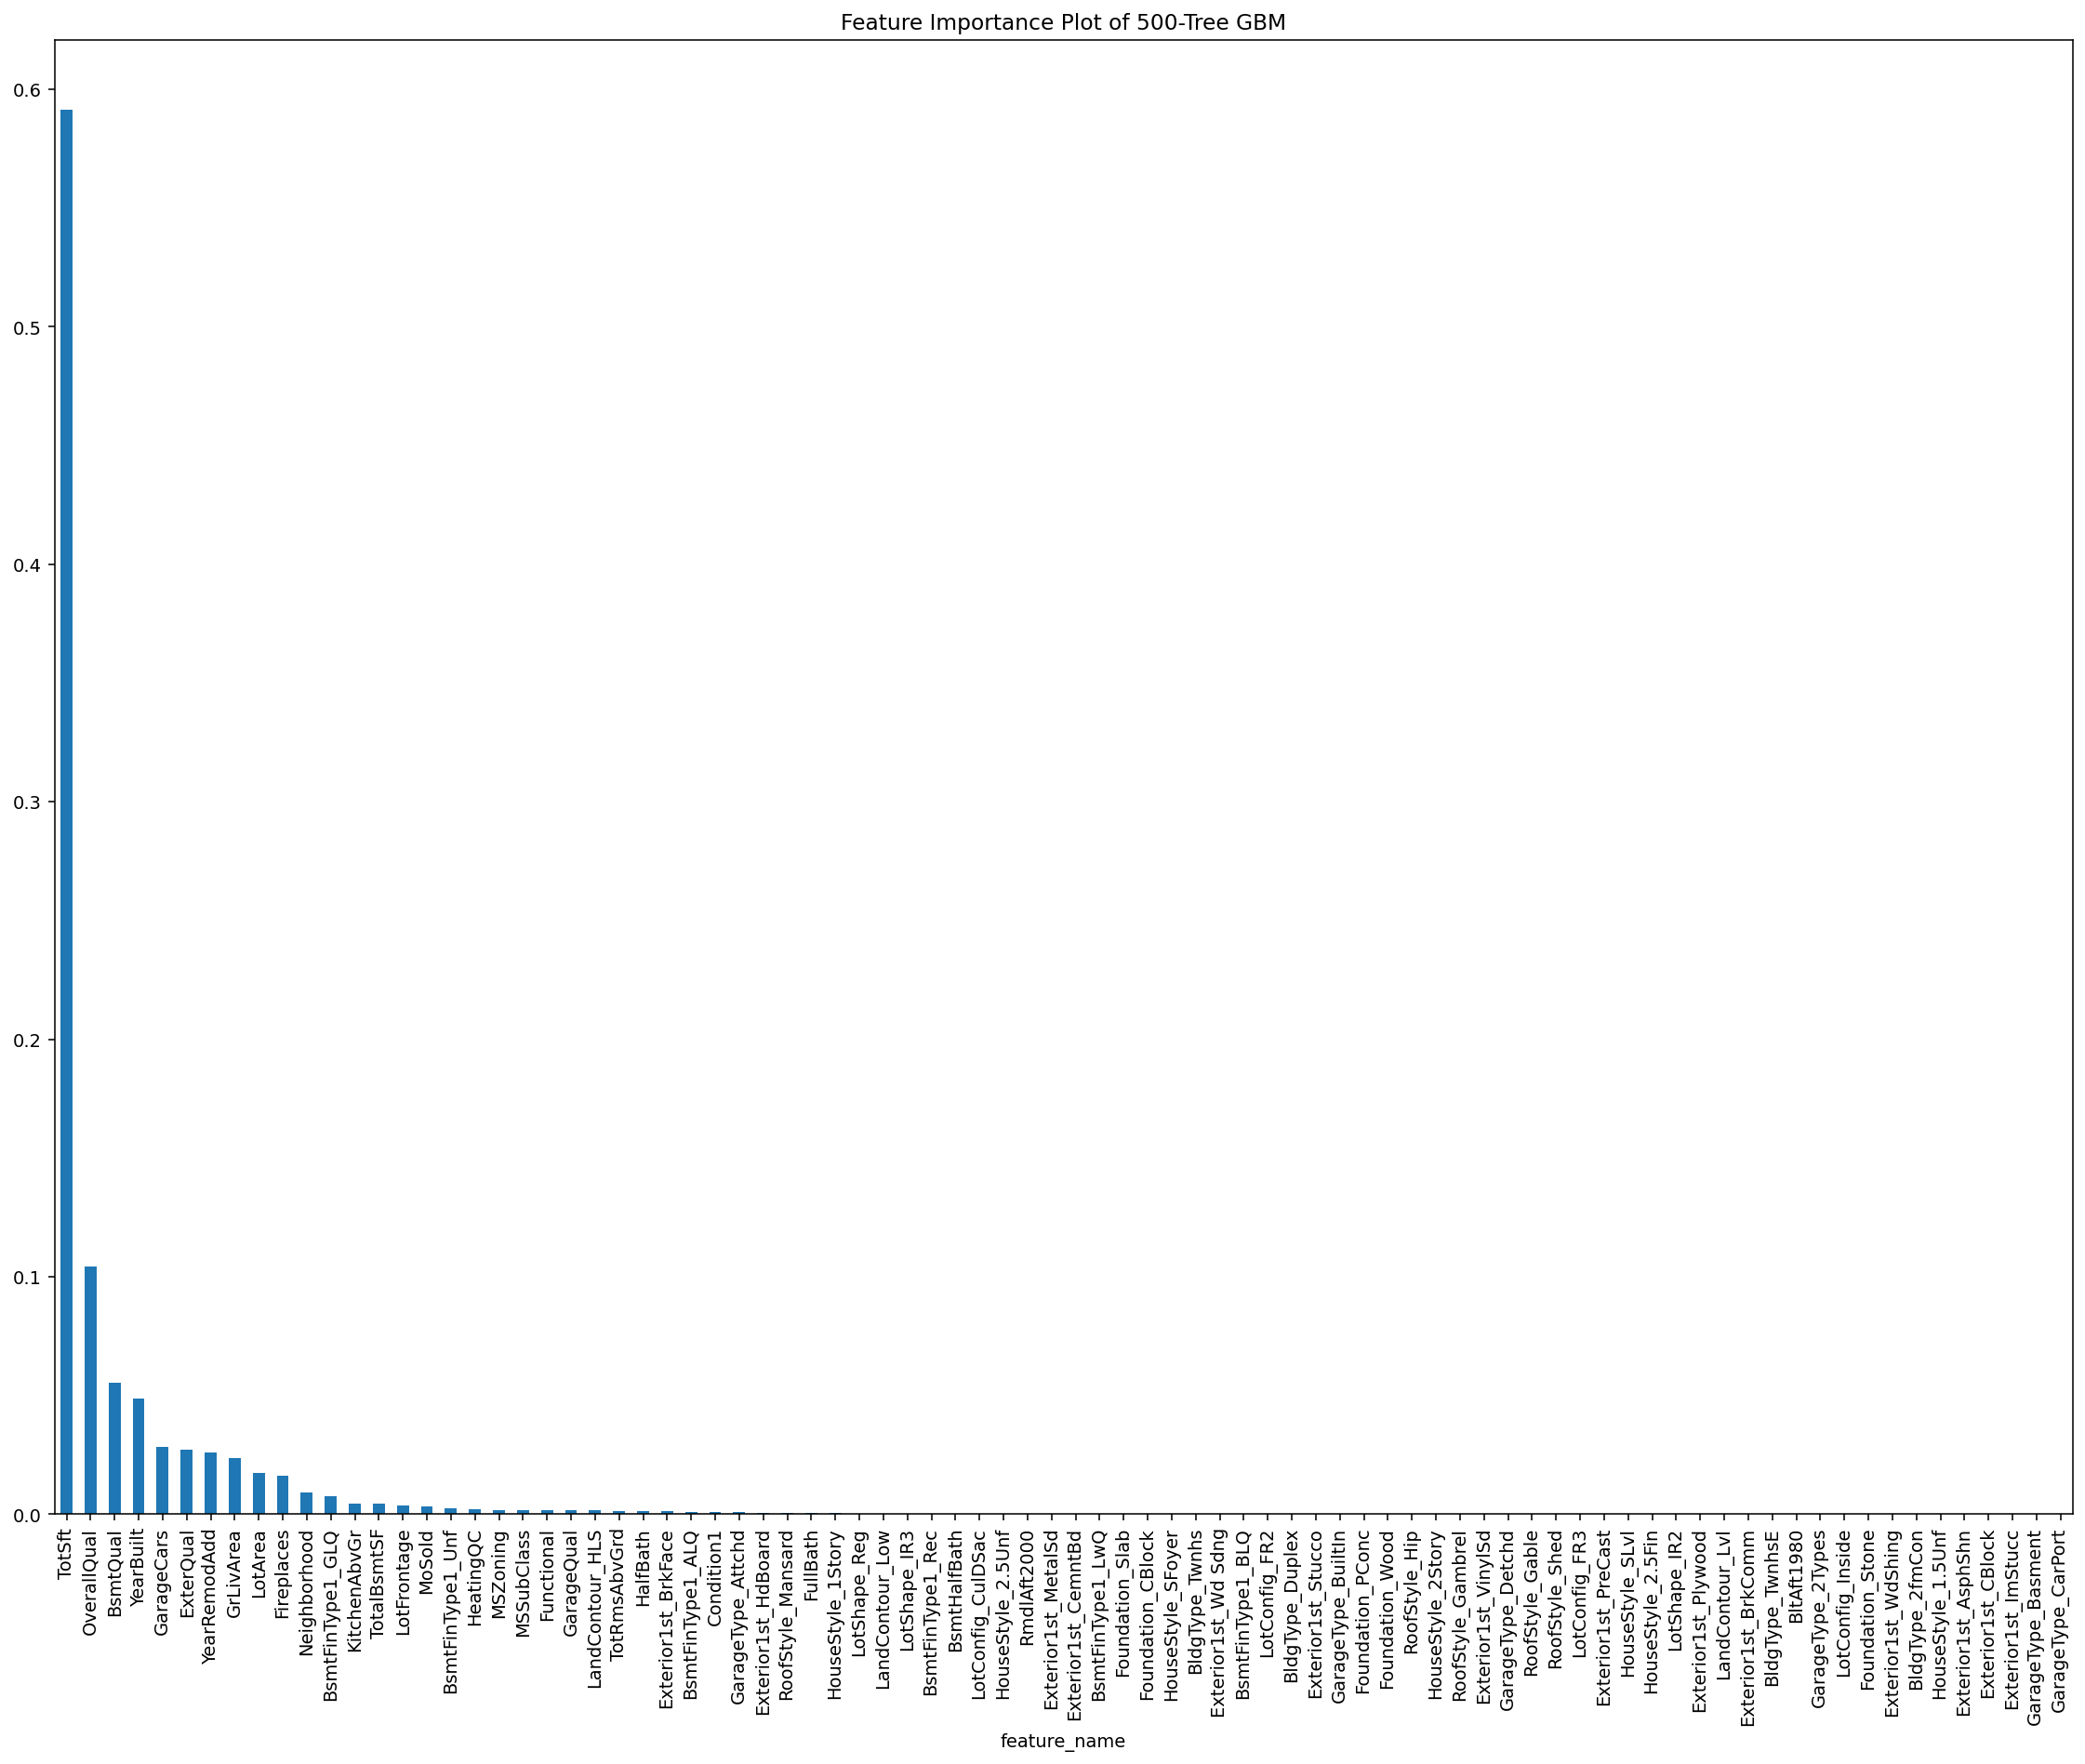

In [963]:
feature_name, importance = zip(*sorted_importance) 
pd.DataFrame({'feature_name':feature_name, 'importance_score':importance}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot of 500-Tree GBM')

In [889]:
gbr_ = GradientBoostingRegressor()

In [911]:

gbr_param = [
 
    {'n_estimators': [300,500,1000],
     'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3,5],
    'loss':['squared_error']
}
    
#     {'C': [1.5, 10, 20],
#      'gamma': np.linspace(1e-4, 1e-2, 10),
#      'kernel': ['linear'],
#     'epsilon': [0.1,0.2,0.5,0.3]}
]

In [912]:
grid_gbr = GridSearchCV(gbr_, gbr_param, scoring='r2', return_train_score=True,verbose=1)

In [913]:
grid_gbr.fit(X_train_gbr,y_train_gbr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid=[{'learning_rate': [0.01, 0.1, 0.2],
                          'loss': ['squared_error'], 'max_depth': [3, 5],
                          'n_estimators': [300, 500, 1000]}],
             return_train_score=True, scoring='r2', verbose=1)

In [914]:
grid_gbr.best_score_

0.9007049253686621

In [915]:
grid_gbr.best_params_

{'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'n_estimators': 300}

AttributeError: 'GradientBoostingRegressor' object has no attribute 'score_samples'